## Introduction

This project is inspired by the most common issue in the San Francisco Bay Area. The housing market has been very tough on buyers for the last few years. After searching housing data on google, there was a kaggle site link came up where the Zillow housing data was already available. Many kagglers has done massive data exploration and some of the plots down below are forked from there.  There is lot of price prediction has been performed on this dataset, so we would like to jump in slightly different approach. We would like to find out if the new house sale listing will stay on the website more than average days or below average days.

About Zillow: Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of their data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.savefig('destination_path.eps', format='eps', dpi=1200)
plt.rcParams["figure.figsize"] = (20,3)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

HTML('''<script> $('div .input').hide()''')

## Loading the Dataset

In [2]:
County_time_series=pd.read_csv('./zillow_data/County_time_series.csv',parse_dates=True)
County_crosswalk=pd.read_csv('./zillow_data/CountyCrossWalk_Zillow.csv',parse_dates=True)
Data_dict=pd.read_csv('./zillow_data/DataDictionary.csv',parse_dates=True)
Metro=pd.read_csv('./zillow_data/Metro_time_series.csv',parse_dates=True)
Neighborhood=pd.read_csv('./zillow_data/Neighborhood_time_series.csv',parse_dates=True)
Zip_time_series=pd.read_csv('./zillow_data/Zip_time_series.csv',parse_dates=True)
df_city_time_seris = pd.read_csv('./zillow_data/City_time_series.csv')

In [3]:
State_time_series=pd.read_csv('./zillow_data/State_time_series.csv',parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year
State_time_series.head()
State_time_series=State_time_series[State_time_series.RegionName!= 'SouthDakota']

Text(0.5,1,'Average number of days (States)')

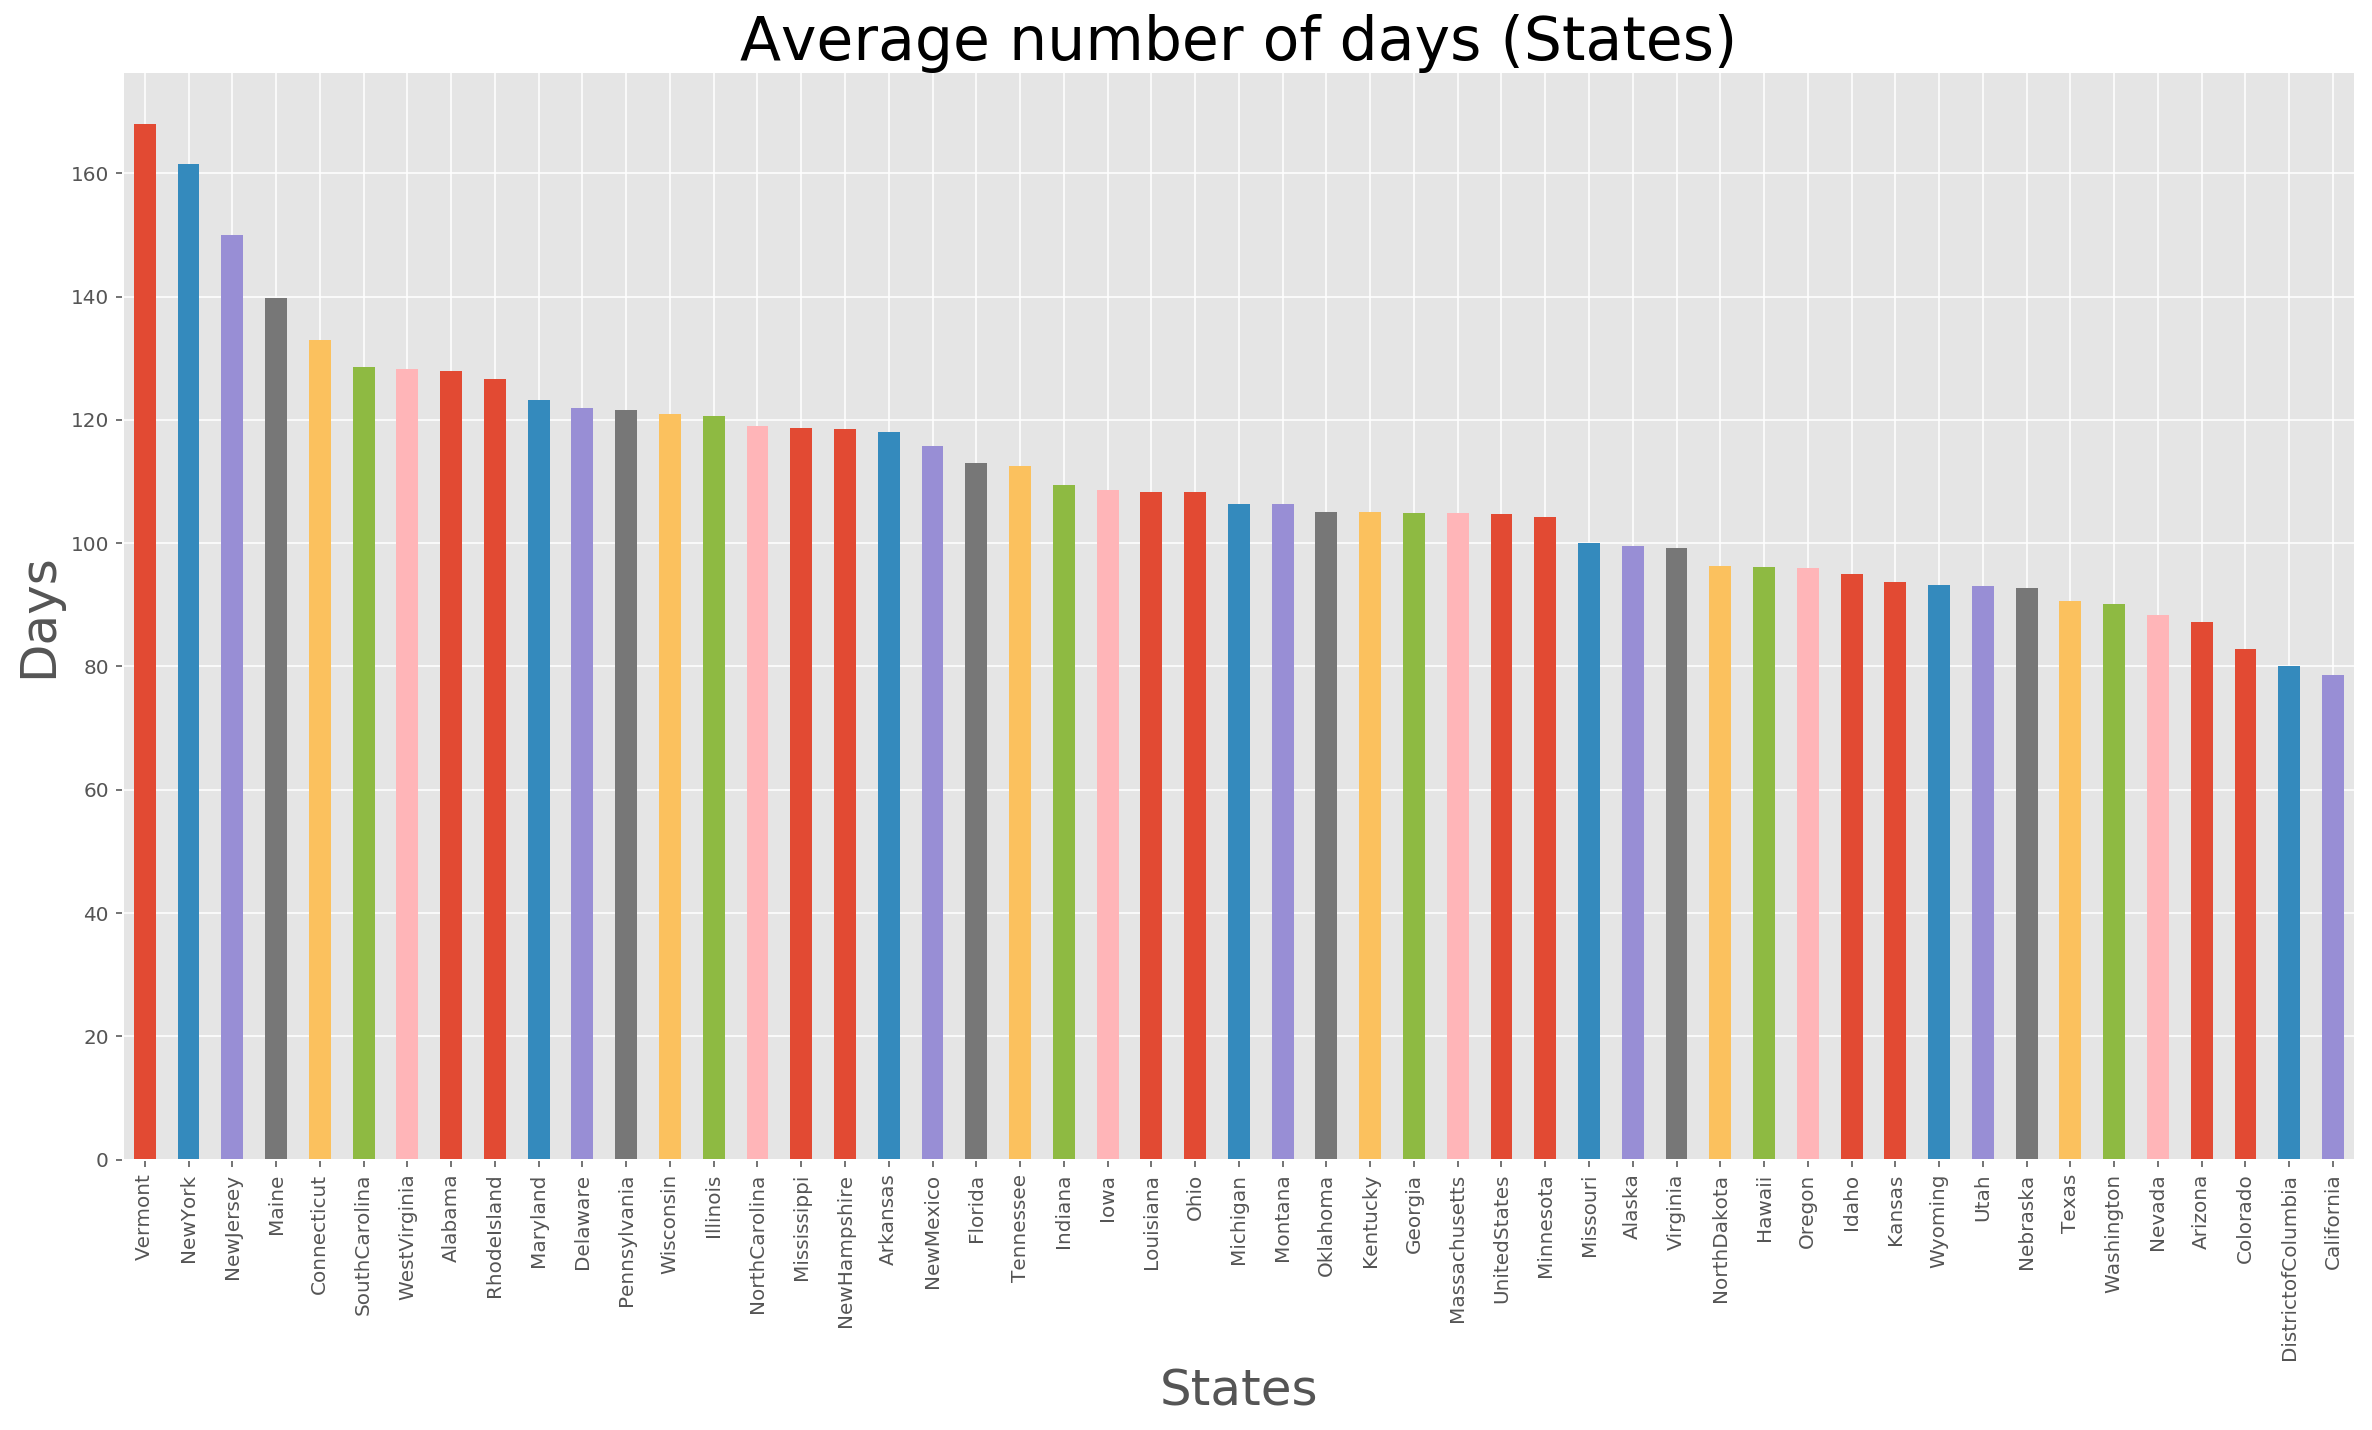

In [4]:
x = State_time_series.groupby(State_time_series.RegionName)['DaysOnZillow_AllHomes'].mean()
x.sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.xlabel("States",)
plt.xlabel("States",fontsize = 25)
plt.ylabel("Days",fontsize = 25)
plt.title("Average number of days (States)",fontsize = 30)

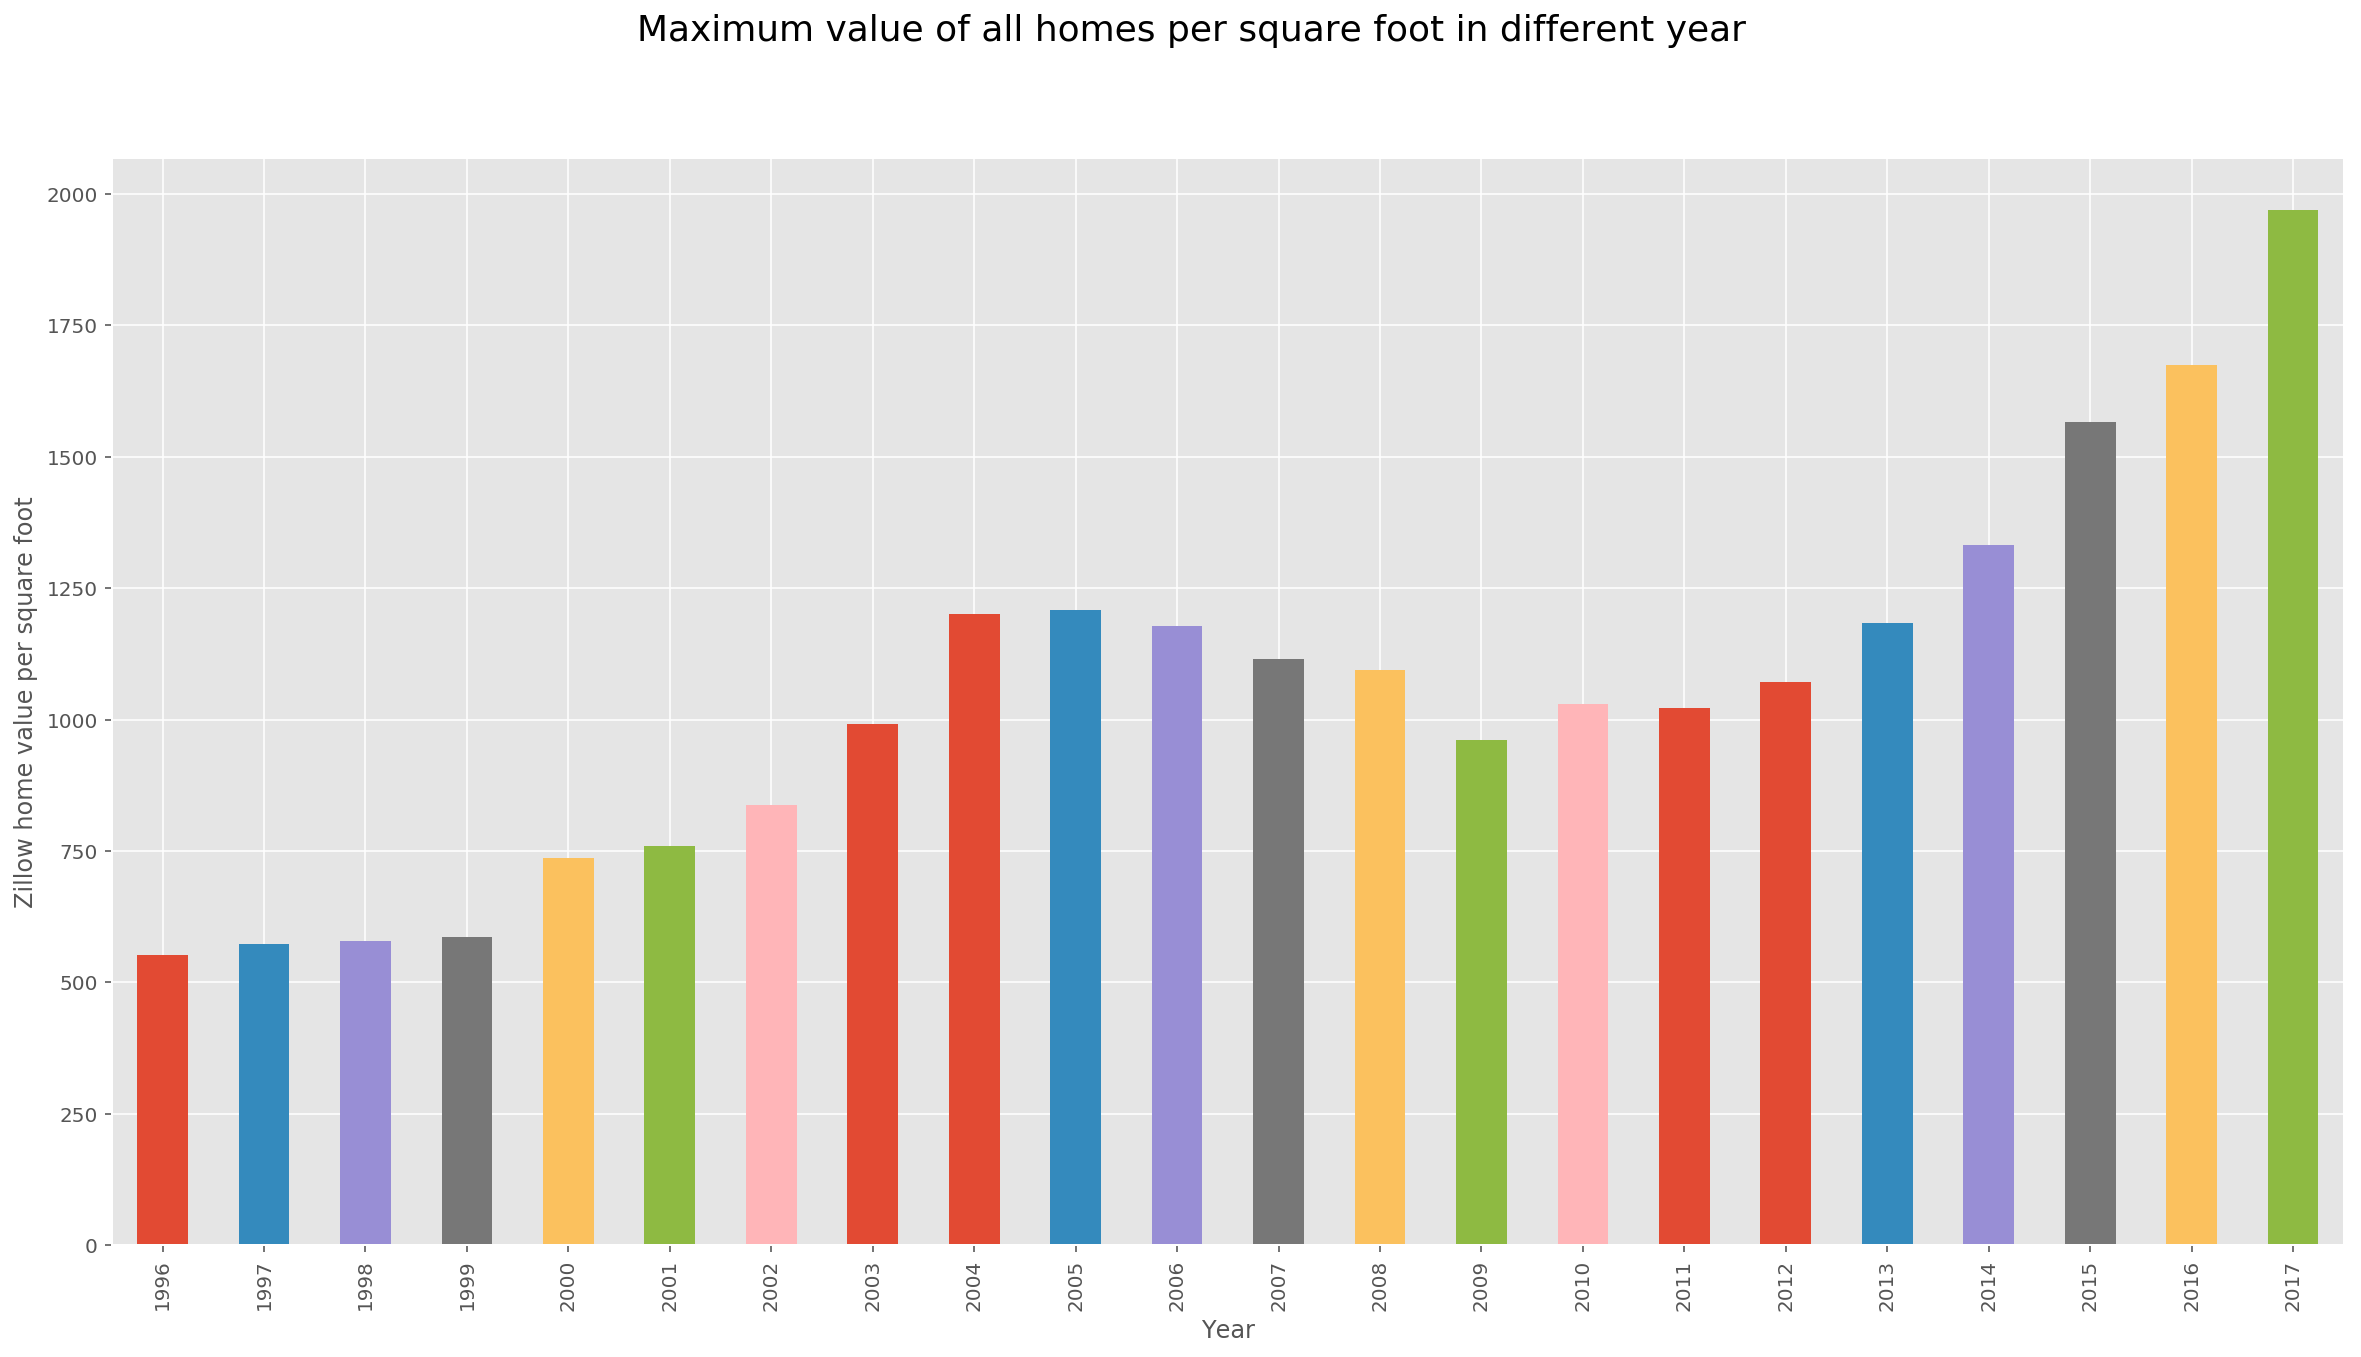

In [5]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].max().plot(kind='bar', figsize=(20,10))
plt.suptitle('Maximum value of all homes per square foot in different year', fontsize=18)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

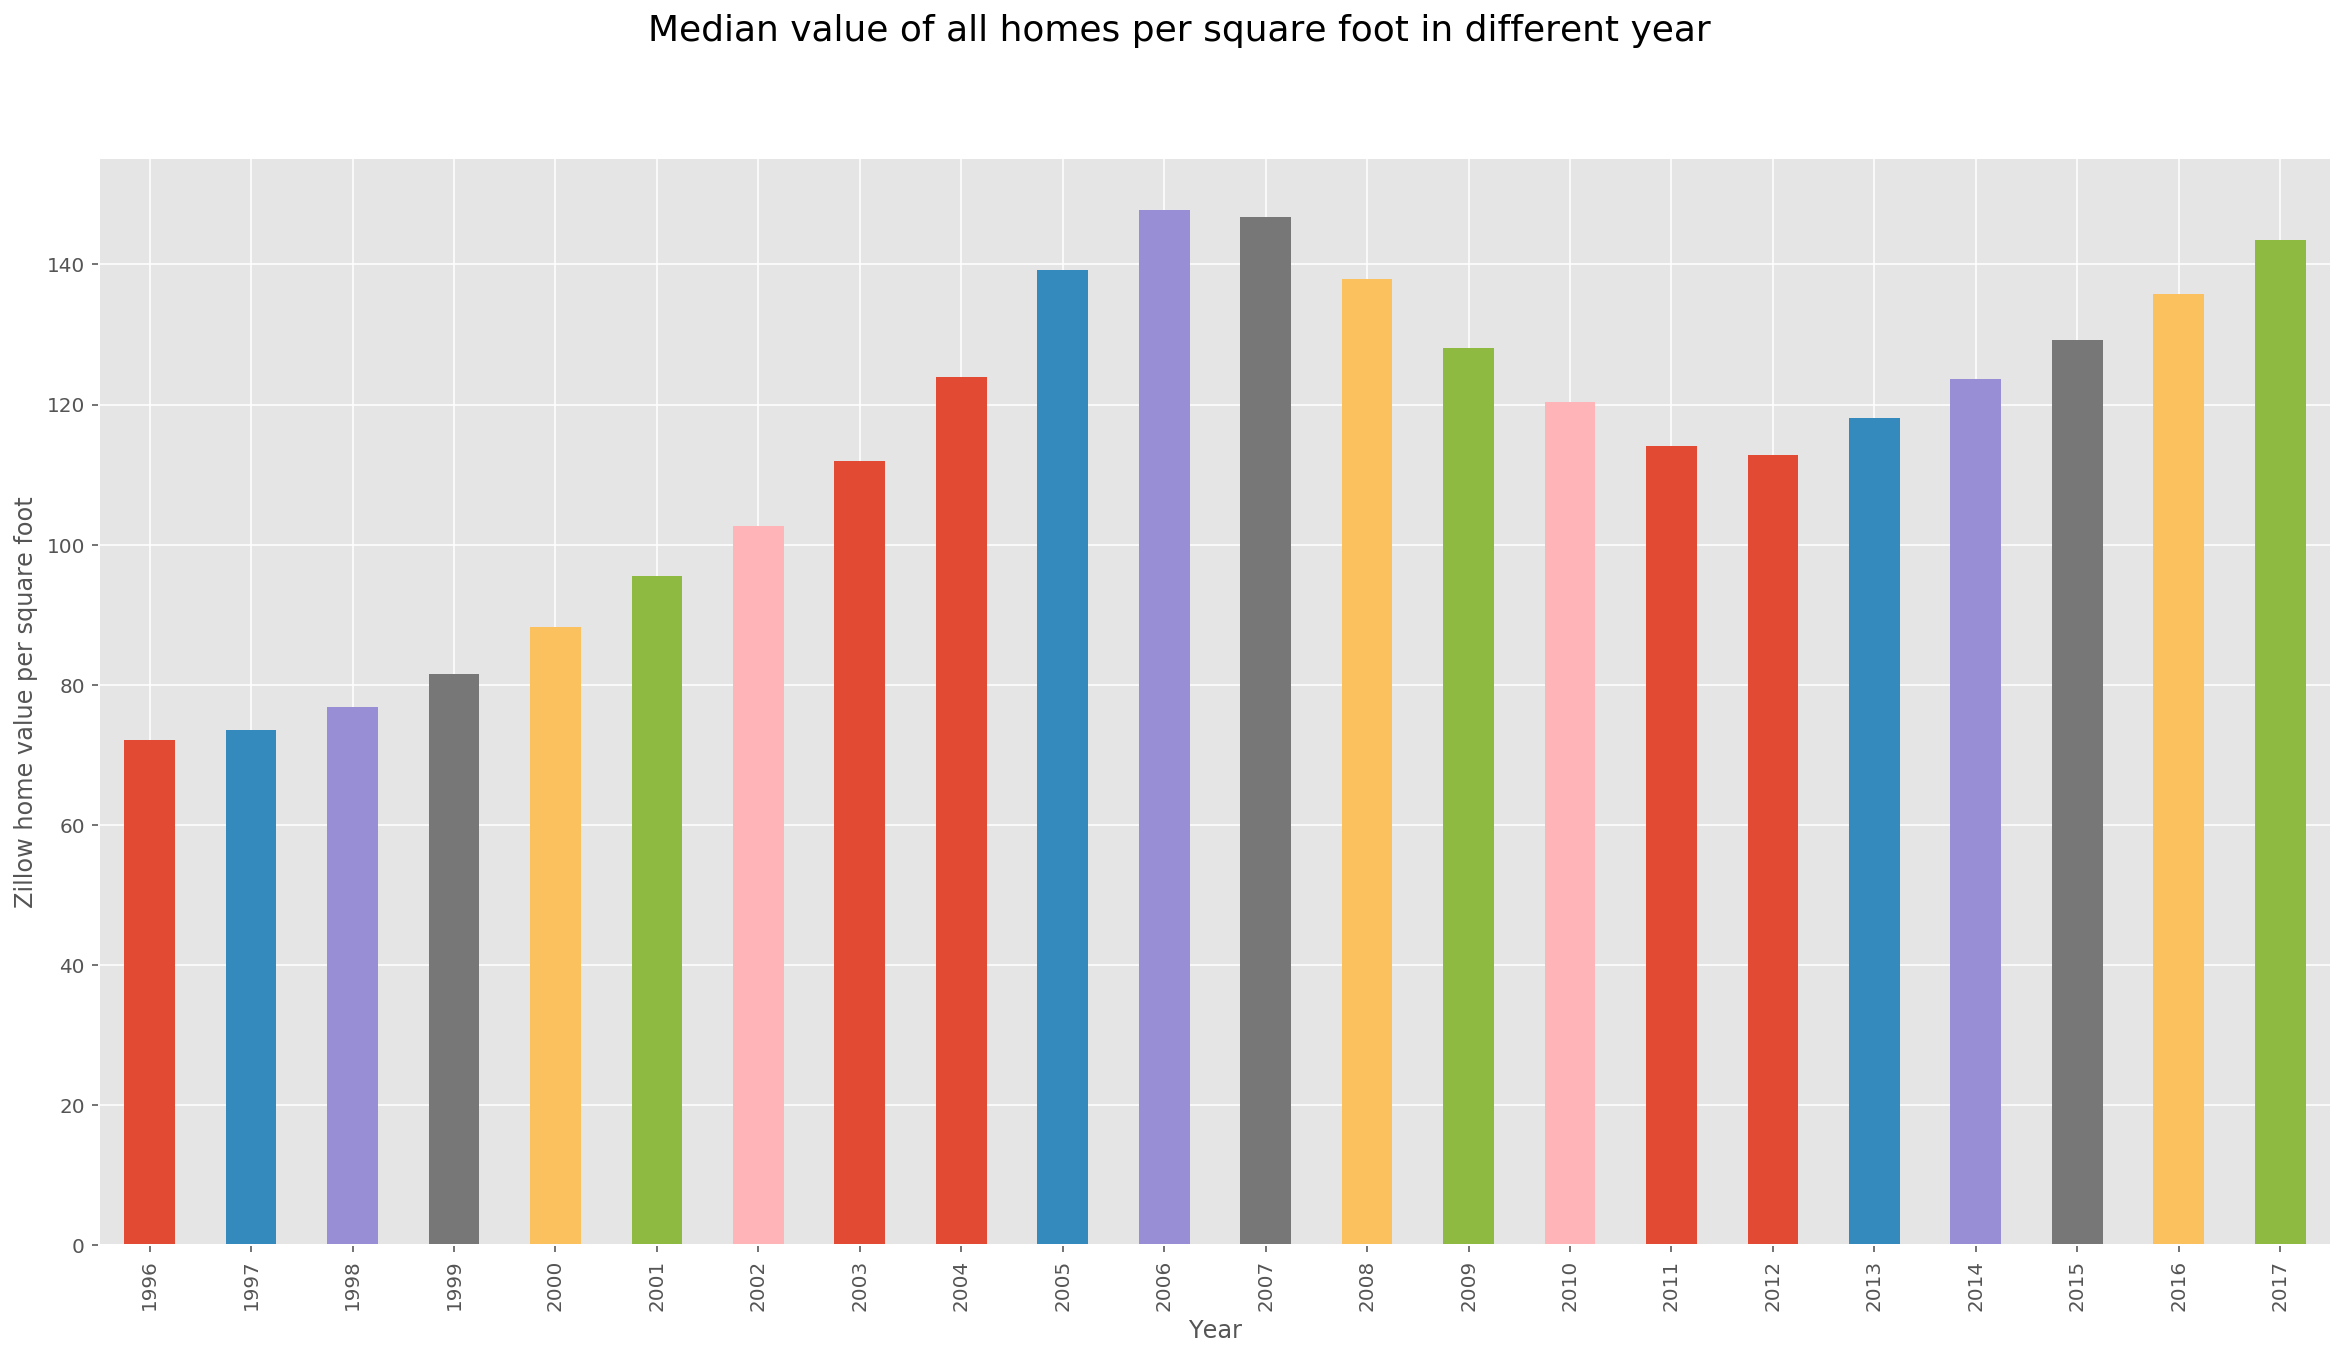

In [6]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(20,10))
plt.suptitle('Median value of all homes per square foot in different year', fontsize=18)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

In [7]:
States = ['California','Colorado','Michigan']
states_names = df_city_time_seris.loc[df_city_time_seris['RegionName'].isin(States)]
newdf3 = states_names.loc[df_city_time_seris['RegionName'] == 'California']
newdf4 = states_names.loc[df_city_time_seris['RegionName'] == 'Colorado']
newdf5 = states_names.loc[df_city_time_seris['RegionName'] == 'Michigan']


Text(0,0.5,'Price')

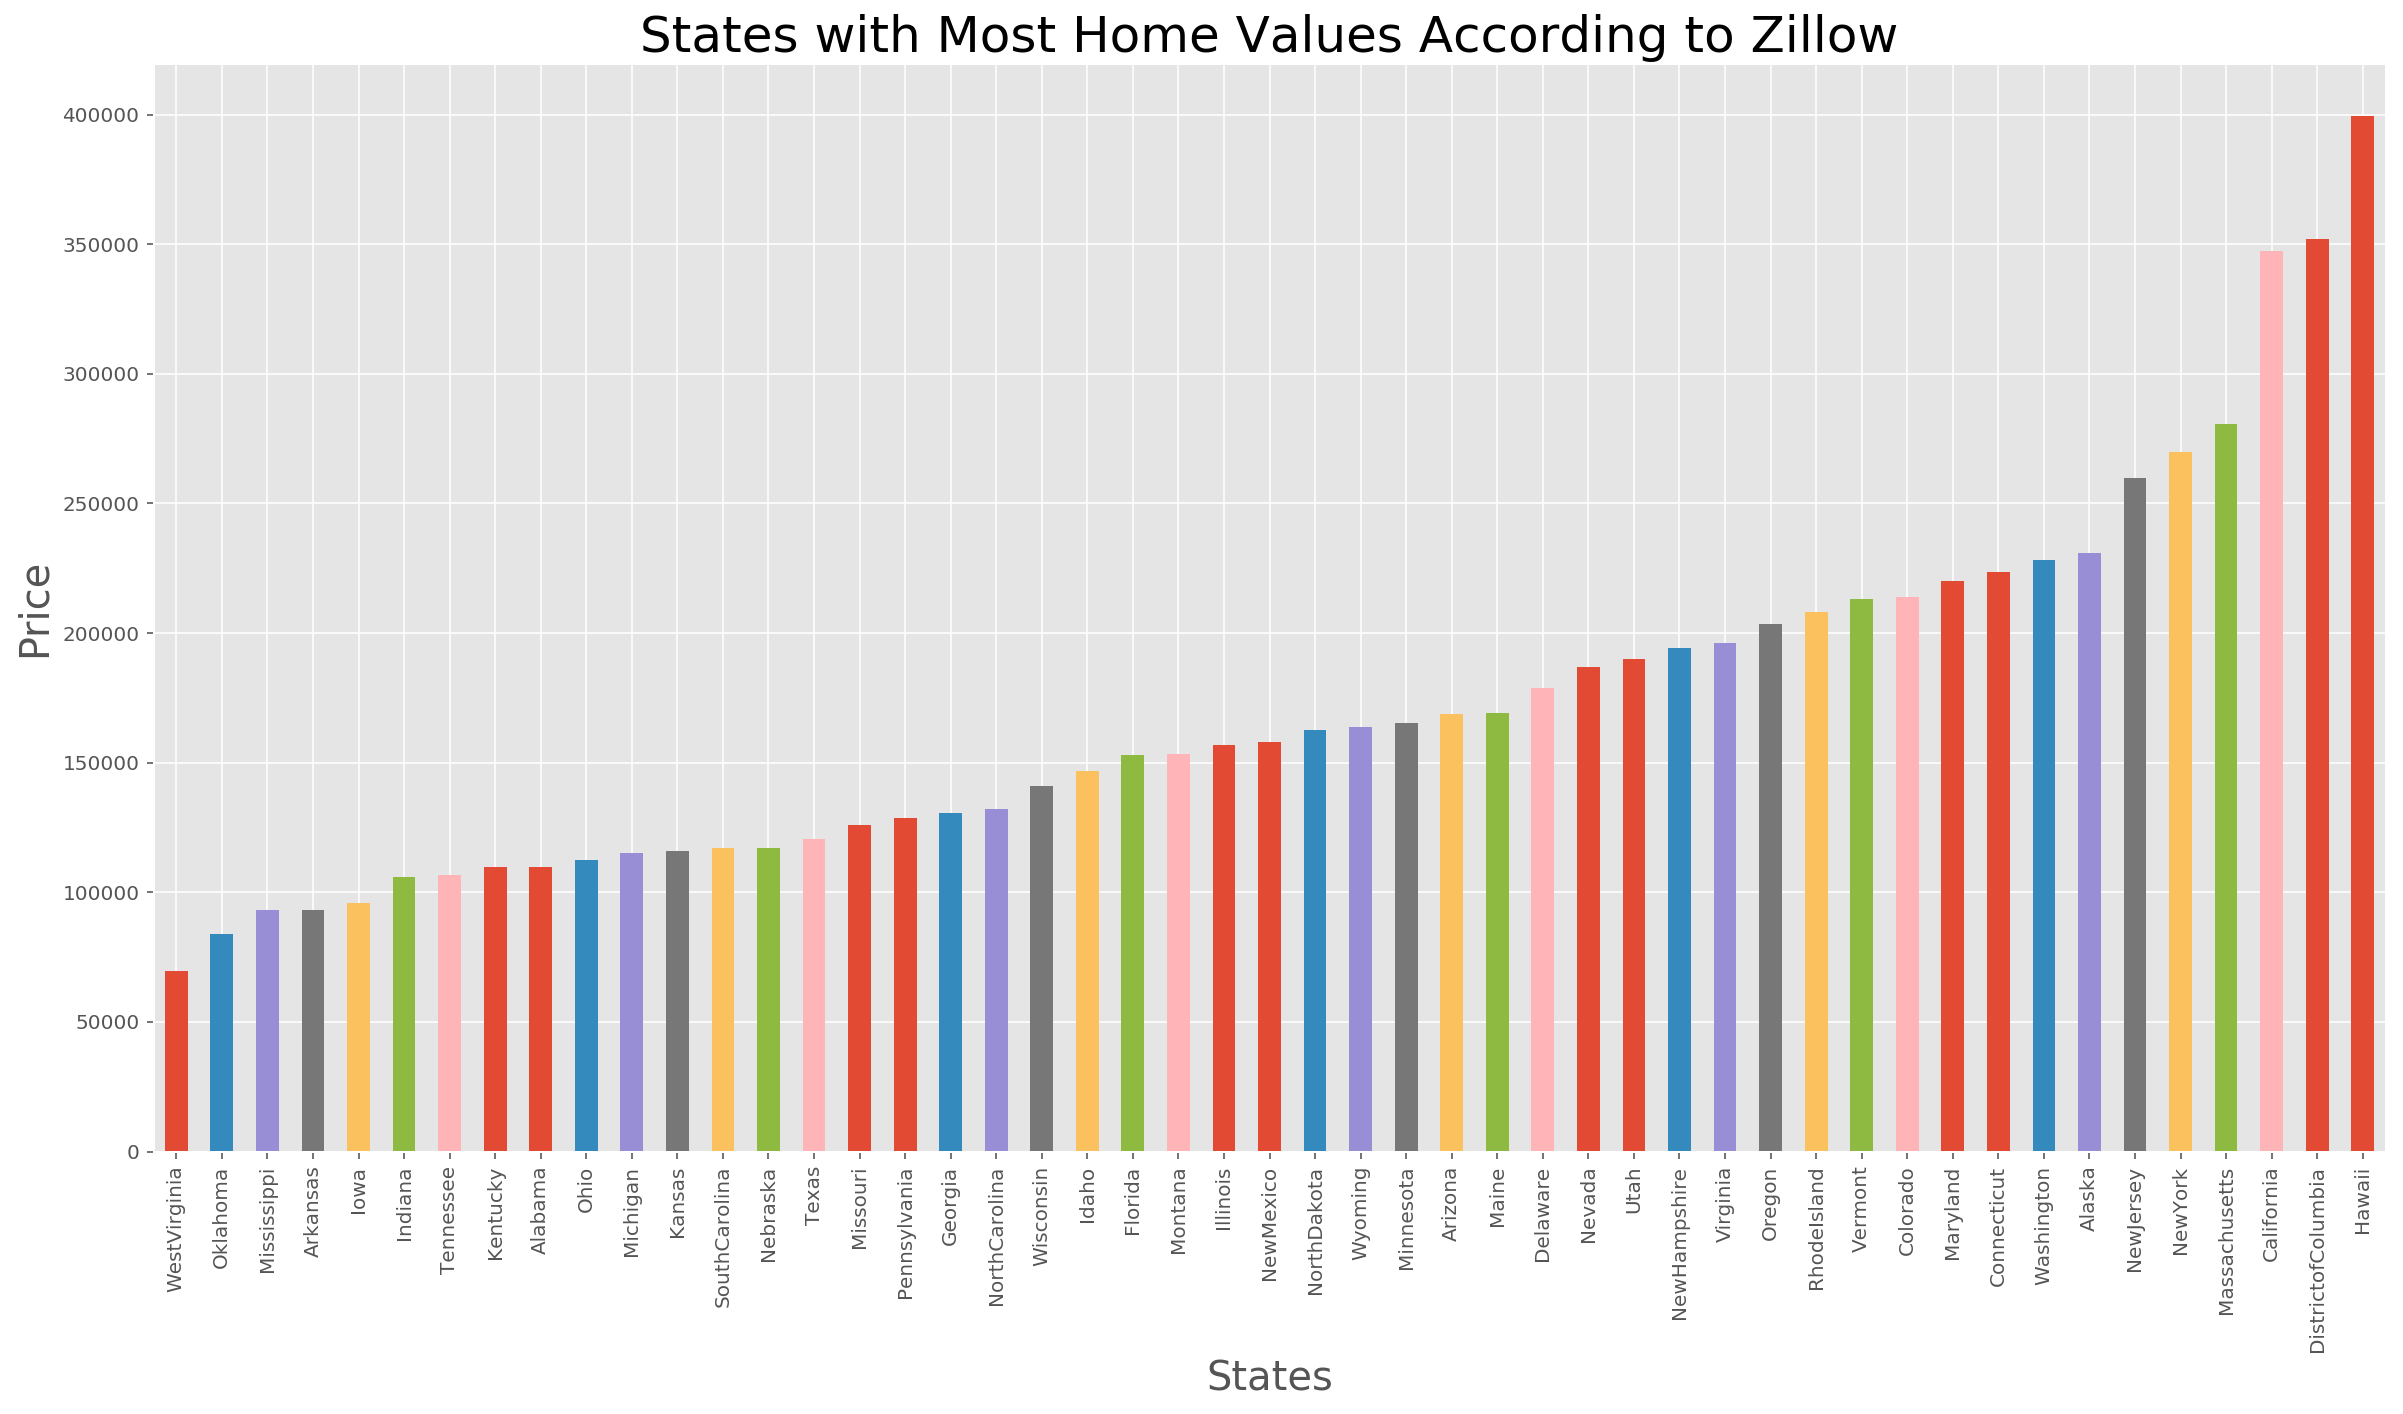

In [8]:
state_without_null = State_time_series.dropna(subset=['ZHVI_AllHomes'], how='any') ## getting rid of null values
state_without_null.Date = state_without_null.Date.dt.year ## set date to year.

state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().plot( kind = 'bar',figsize=(20,10))
plt.title('States with Most Home Values According to Zillow', fontsize = 25)
plt.xlabel('States',fontsize = 20)
plt.ylabel('Price',fontsize = 20)

In [9]:
top_states = state_without_null[(state_without_null.RegionName == "NewYork")|
                   (state_without_null.RegionName == "Colorado")|
                   (state_without_null.RegionName == "Alaska")|
                   (state_without_null.RegionName == "Massachusetts")|
                   (state_without_null.RegionName == "California")|
                   (state_without_null.RegionName == "Hawaii")|
                   (state_without_null.RegionName == "DistrictofColumbia")]

Text(0.5,1,' ZHVI home values change in overtime (States)')

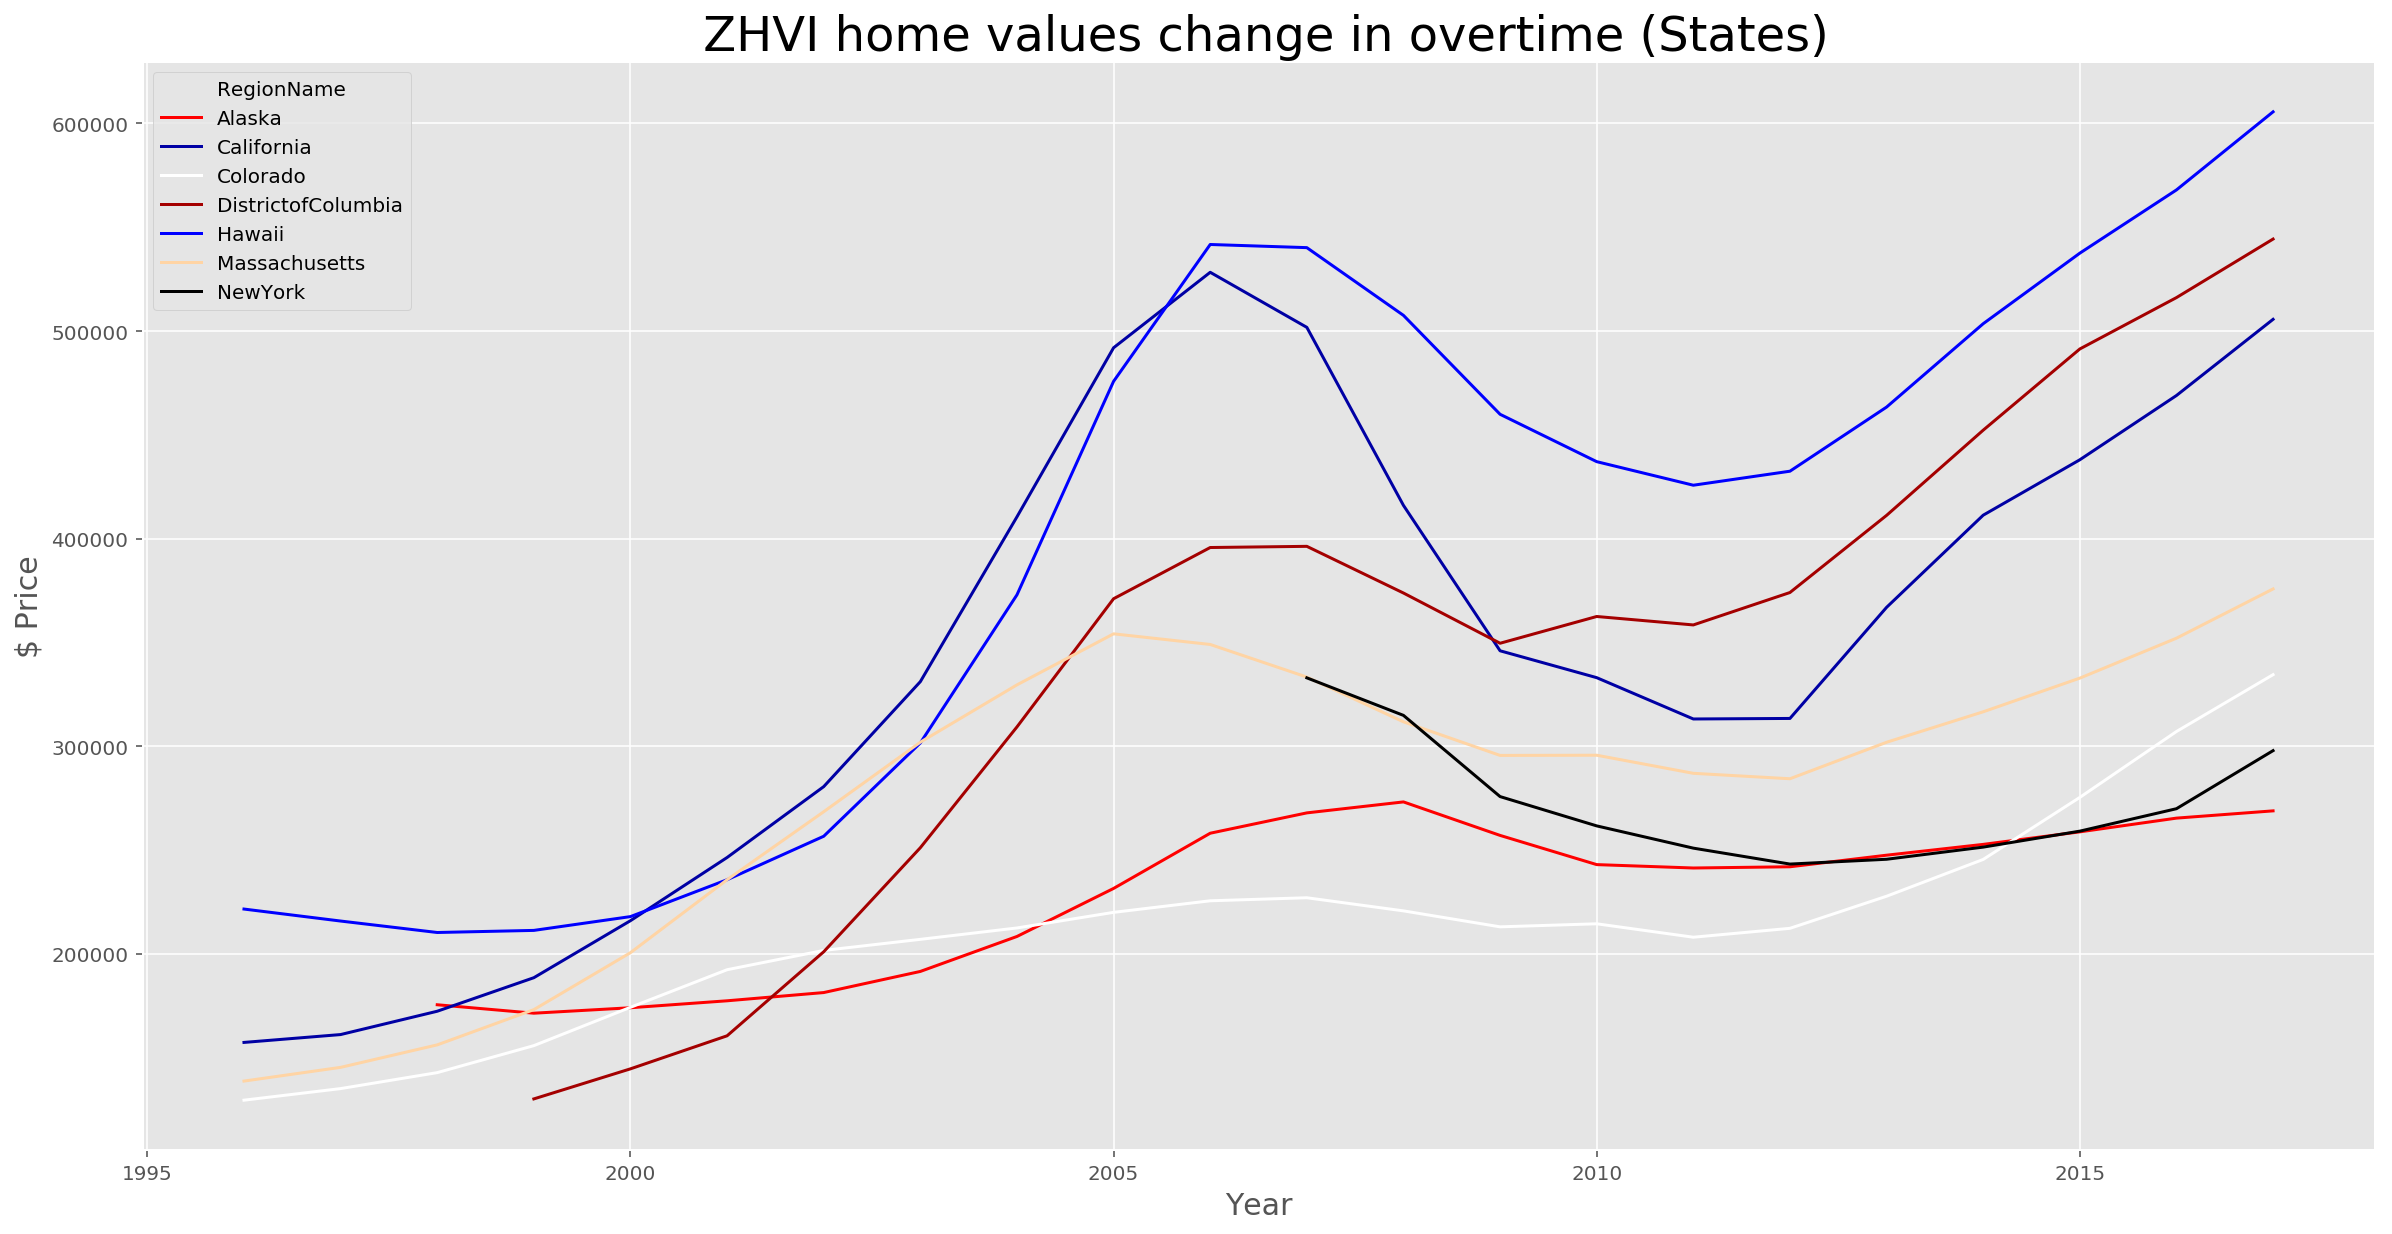

In [10]:
pd.pivot_table(top_states, 
               index="Date", 
               columns="RegionName", 
               values="ZHVI_AllHomes").plot(kind = 'line', figsize = (20,10),colormap='flag', legend = True)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("$ Price",  fontsize = 15)
plt.title(" ZHVI home values change in overtime (States)", fontsize = 24)

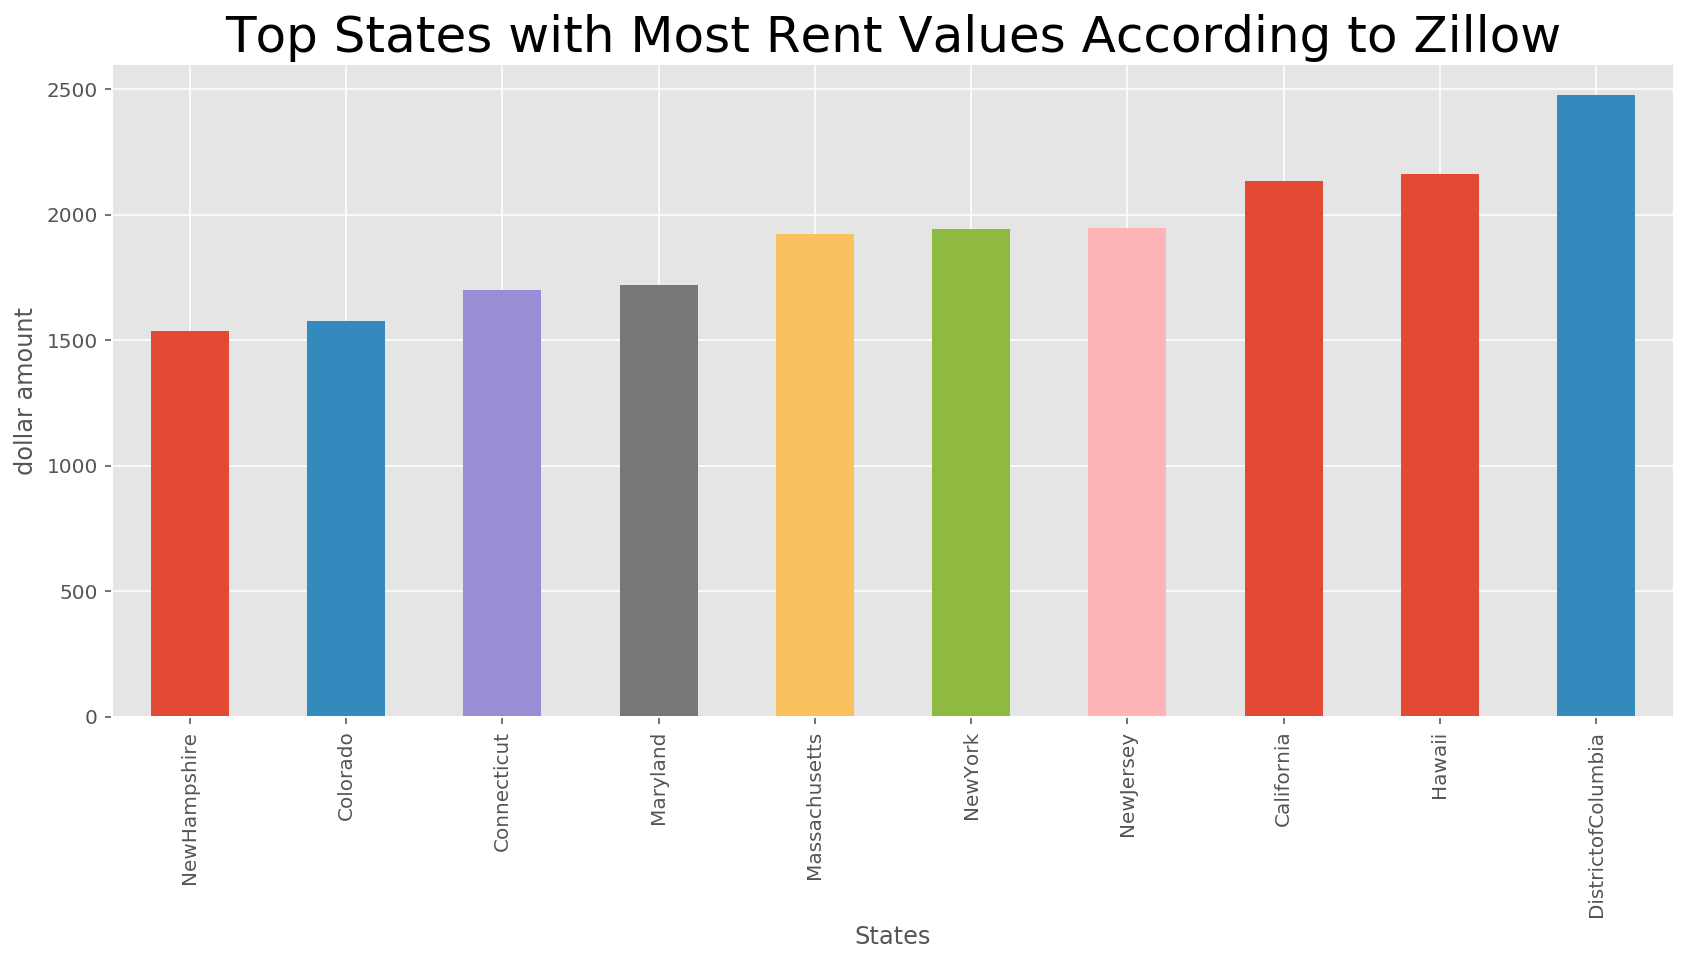

In [11]:
x =state_without_null[state_without_null.RegionName != 'Alaska']
plt.subplots(figsize = (14,6))
x.groupby(x.RegionName)['ZRI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar')
plt.title('Top States with Most Rent Values According to Zillow', fontsize = 25)
plt.xlabel('States')
plt.ylabel('dollar amount');

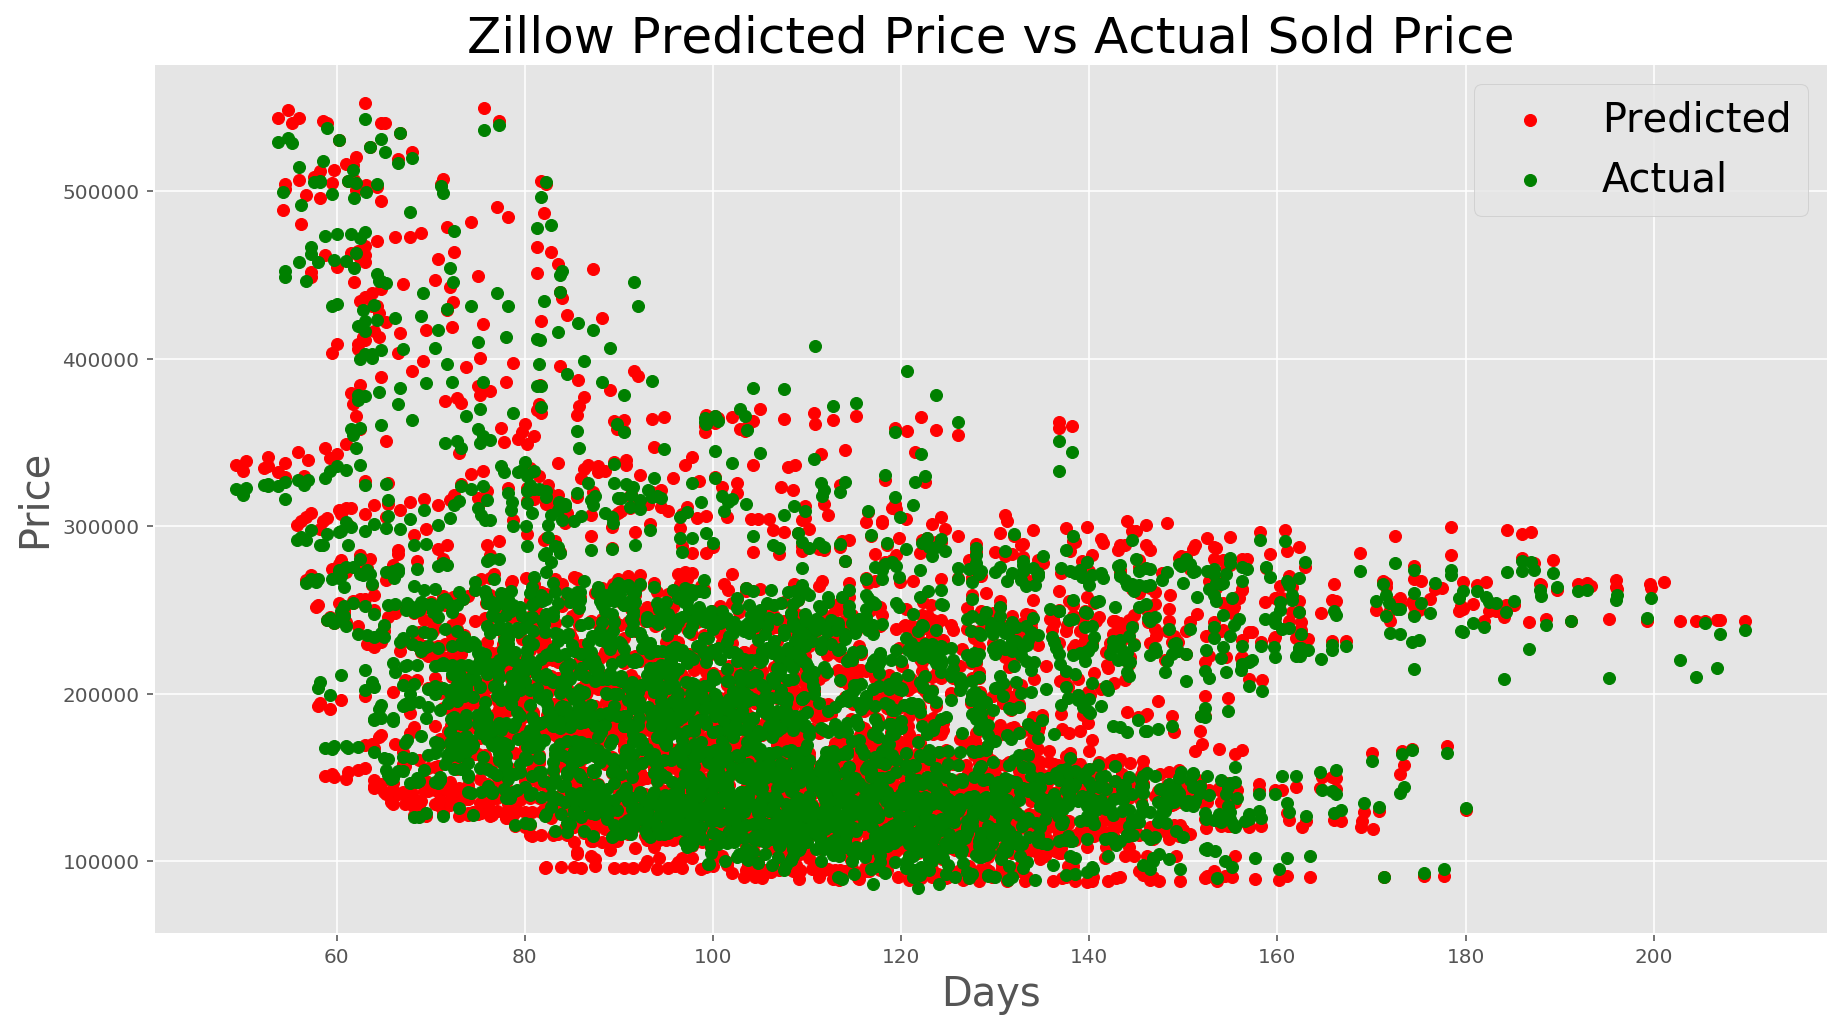

In [12]:
states = set(State_time_series[
    ~State_time_series['ZHVI_AllHomes'].isnull() &
    ~State_time_series['Sale_Prices'].isnull()
                      ]['RegionName'].values)

State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
plt.figure(figsize=(15,8));

plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZHVI_AllHomes, c="red");
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.Sale_Prices, c ="green");
plt.title("Zillow Predicted Price vs Actual Sold Price", fontsize = 25)
plt.ylabel("Price" , fontsize = 20)
plt.xlabel("Days" , fontsize = 20)
plt.legend(("Predicted","Actual"), fontsize=20)

## Machine Learning part here


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation import plot
from sklearn_evaluation.plot import grid_search

Since the data has lot of Nan values so we will be using only the last 4000 rows where we have most of the data filled up.

In [14]:
state_data = State_time_series.tail(4000)
state_data = state_data[['DaysOnZillow_AllHomes','MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence','ZHVIPerSqft_AllHomes', 'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_CondoCoop',
       'PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence',
       'PctOfListingsWithPriceReductions_AllHomes',
       'PctOfListingsWithPriceReductions_CondoCoop',
       'PctOfListingsWithPriceReductions_SingleFamilyResidence',
       'PriceToRentRatio_AllHomes', 'Sale_Counts', 'Sale_Counts_Seas_Adj',
       'Sale_Prices']]

### Selecting features 

In [15]:
state_data.isna().sum()

DaysOnZillow_AllHomes                                              50
MedianListingPricePerSqft_1Bedroom                               1005
MedianListingPricePerSqft_2Bedroom                                299
MedianListingPricePerSqft_3Bedroom                                261
MedianListingPricePerSqft_4Bedroom                                226
MedianListingPricePerSqft_5BedroomOrMore                          282
MedianListingPricePerSqft_AllHomes                                230
MedianListingPricePerSqft_CondoCoop                               578
MedianListingPricePerSqft_DuplexTriplex                           684
MedianListingPricePerSqft_SingleFamilyResidence                   247
ZHVIPerSqft_AllHomes                                              156
PctOfHomesDecreasingInValues_AllHomes                            1177
PctOfHomesIncreasingInValues_AllHomes                            1177
PctOfHomesSellingForGain_AllHomes                                3774
PctOfHomesSellingFor

As we can see that there are lot of missing values in each column. First of all, we will drop the rows with missing sale price values. The reason we do not want to impute the median or mean value in sale price columns is that some of the houses are 3 bedroom, 2 bedroom or 1 bedroom. We also do not have zipcode of those houses so we cannot impute average in that column. We know that some of the areas in country are very expensive compare to other areas. 

We could use state ot county data to figure out the average home sale price. We do not have sufficient data to do that. Once we filtered the data using states then we barely get hundered of rows.

For the rest of columns, we have estimated 20-30% of Nan values and we will use mean to impute those missing values.

In [16]:
clean_data = state_data.drop(['PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'],axis=1)
clean_data.dropna(how='all',inplace=True)
clean_data.dropna(subset=['Sale_Prices'],inplace= True)
clean_data = clean_data.groupby(clean_data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
clean_data.DaysOnZillow_AllHomes.fillna(clean_data.DaysOnZillow_AllHomes.mean(),inplace=True)
clean_data.head()

,DaysOnZillow_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,...,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices
9133,93.000,186.274854,137.180949,59.626866,63.245931,69.138529,64.741036,168.370208,101.430172,66.034275,...,15.828557,12.639709,16.122921,15.120295,12.061619,15.412030,8.740000,5819.0,4552.0,115900.0
9135,154.500,186.274854,186.537841,172.344828,177.935943,193.575664,167.334140,208.044187,137.900400,162.418524,...,14.724577,13.015519,14.999327,16.990468,14.951875,17.315216,12.330000,6768.0,5848.0,271500.0
9137,155.375,240.703518,164.331665,122.710104,129.090847,140.840220,167.467949,168.370208,189.950000,154.448685,...,13.945084,13.216351,14.015521,16.194720,14.666597,16.469215,10.860000,11691.0,10912.0,241300.0
9138,128.750,151.619433,94.444444,93.758391,99.685535,113.216051,100.058893,118.513452,101.430172,99.693016,...,12.290223,10.372679,12.410508,13.532288,11.424009,13.665720,10.880000,8989.0,7152.0,148600.0
9139,107.125,186.274854,137.180949,130.637818,135.503448,142.502107,138.184055,168.370208,101.430172,134.848219,...,10.330735,10.410849,10.432096,11.819980,10.462553,11.983255,11.502578,569.0,422.0,151200.0


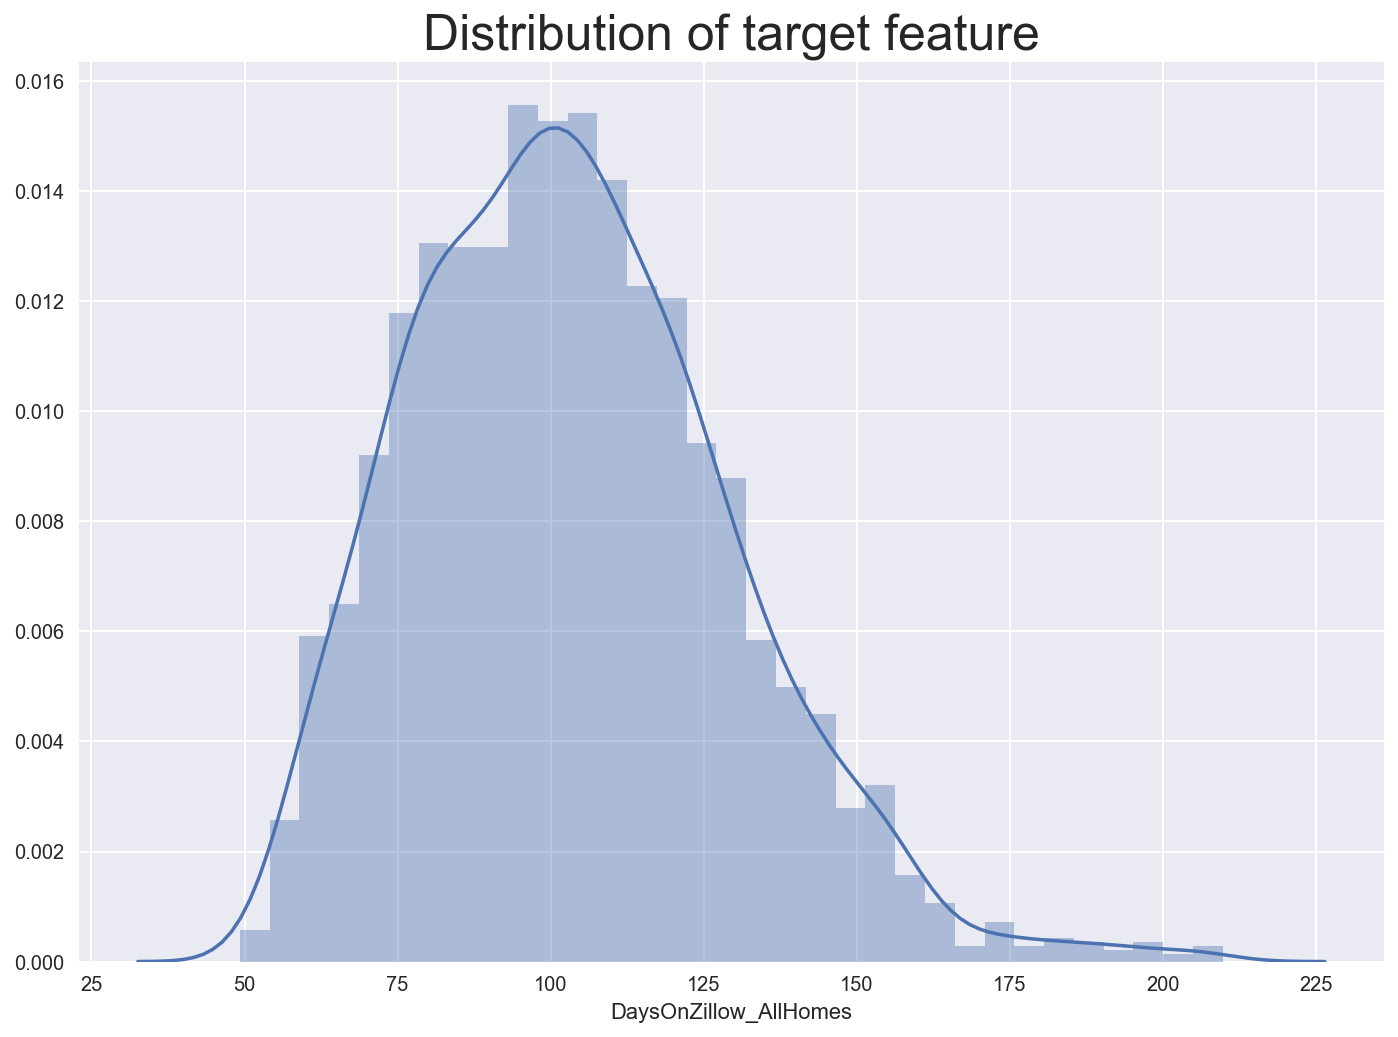

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(clean_data['DaysOnZillow_AllHomes'])
plt.title("Distribution of target feature", fontsize= 25)
plt.show()

#### Inspecting distribution of the target feature

We investigated that if our target feature is normally distributed or no. In case, it is not normally distributed we can normalize the data. However, our target feature is normally distributed.

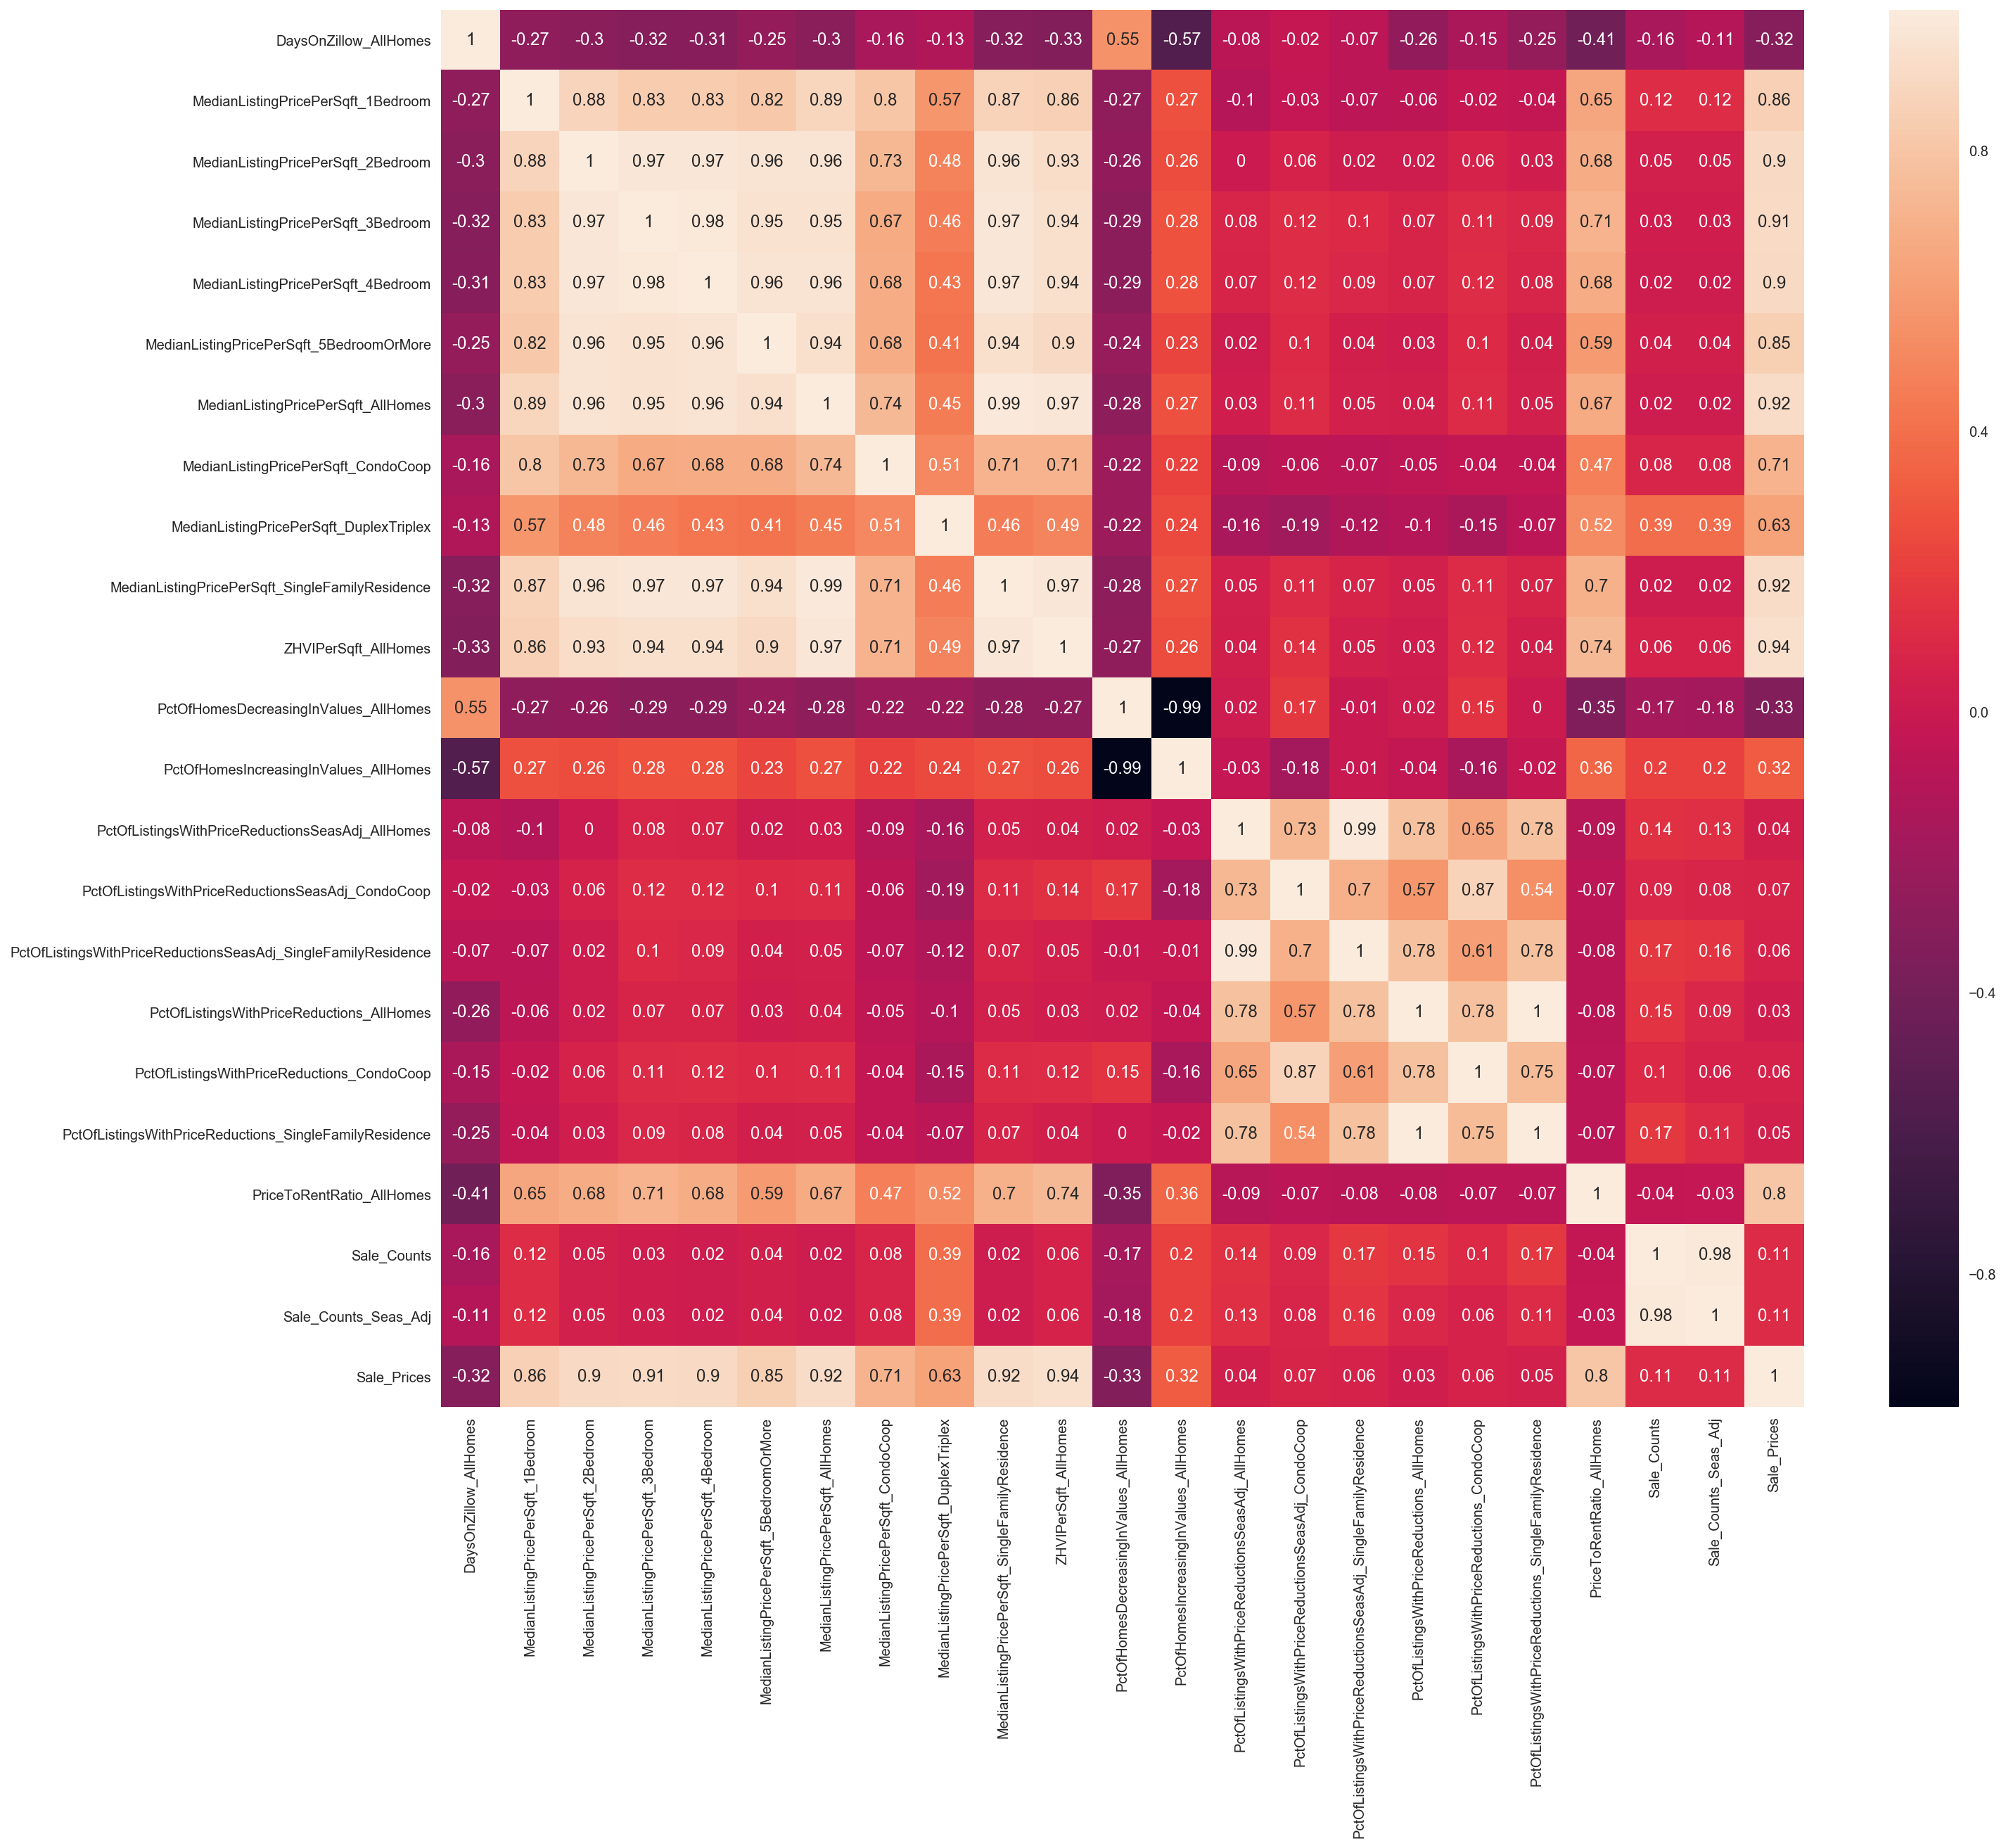

In [18]:
sns.set(rc={'figure.figsize':(21.7,18.27)})
correlation_matrix = clean_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Correlation 

We can see that data does not have much correlation with the target feature. There is only one feature with 0.57 correlation with the target feature. 

## Linear Regression

In [19]:
clean_data.head()

,DaysOnZillow_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,...,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices
9133,93.000,186.274854,137.180949,59.626866,63.245931,69.138529,64.741036,168.370208,101.430172,66.034275,...,15.828557,12.639709,16.122921,15.120295,12.061619,15.412030,8.740000,5819.0,4552.0,115900.0
9135,154.500,186.274854,186.537841,172.344828,177.935943,193.575664,167.334140,208.044187,137.900400,162.418524,...,14.724577,13.015519,14.999327,16.990468,14.951875,17.315216,12.330000,6768.0,5848.0,271500.0
9137,155.375,240.703518,164.331665,122.710104,129.090847,140.840220,167.467949,168.370208,189.950000,154.448685,...,13.945084,13.216351,14.015521,16.194720,14.666597,16.469215,10.860000,11691.0,10912.0,241300.0
9138,128.750,151.619433,94.444444,93.758391,99.685535,113.216051,100.058893,118.513452,101.430172,99.693016,...,12.290223,10.372679,12.410508,13.532288,11.424009,13.665720,10.880000,8989.0,7152.0,148600.0
9139,107.125,186.274854,137.180949,130.637818,135.503448,142.502107,138.184055,168.370208,101.430172,134.848219,...,10.330735,10.410849,10.432096,11.819980,10.462553,11.983255,11.502578,569.0,422.0,151200.0


Text(0.5,1,'Predicted days on Zillow')

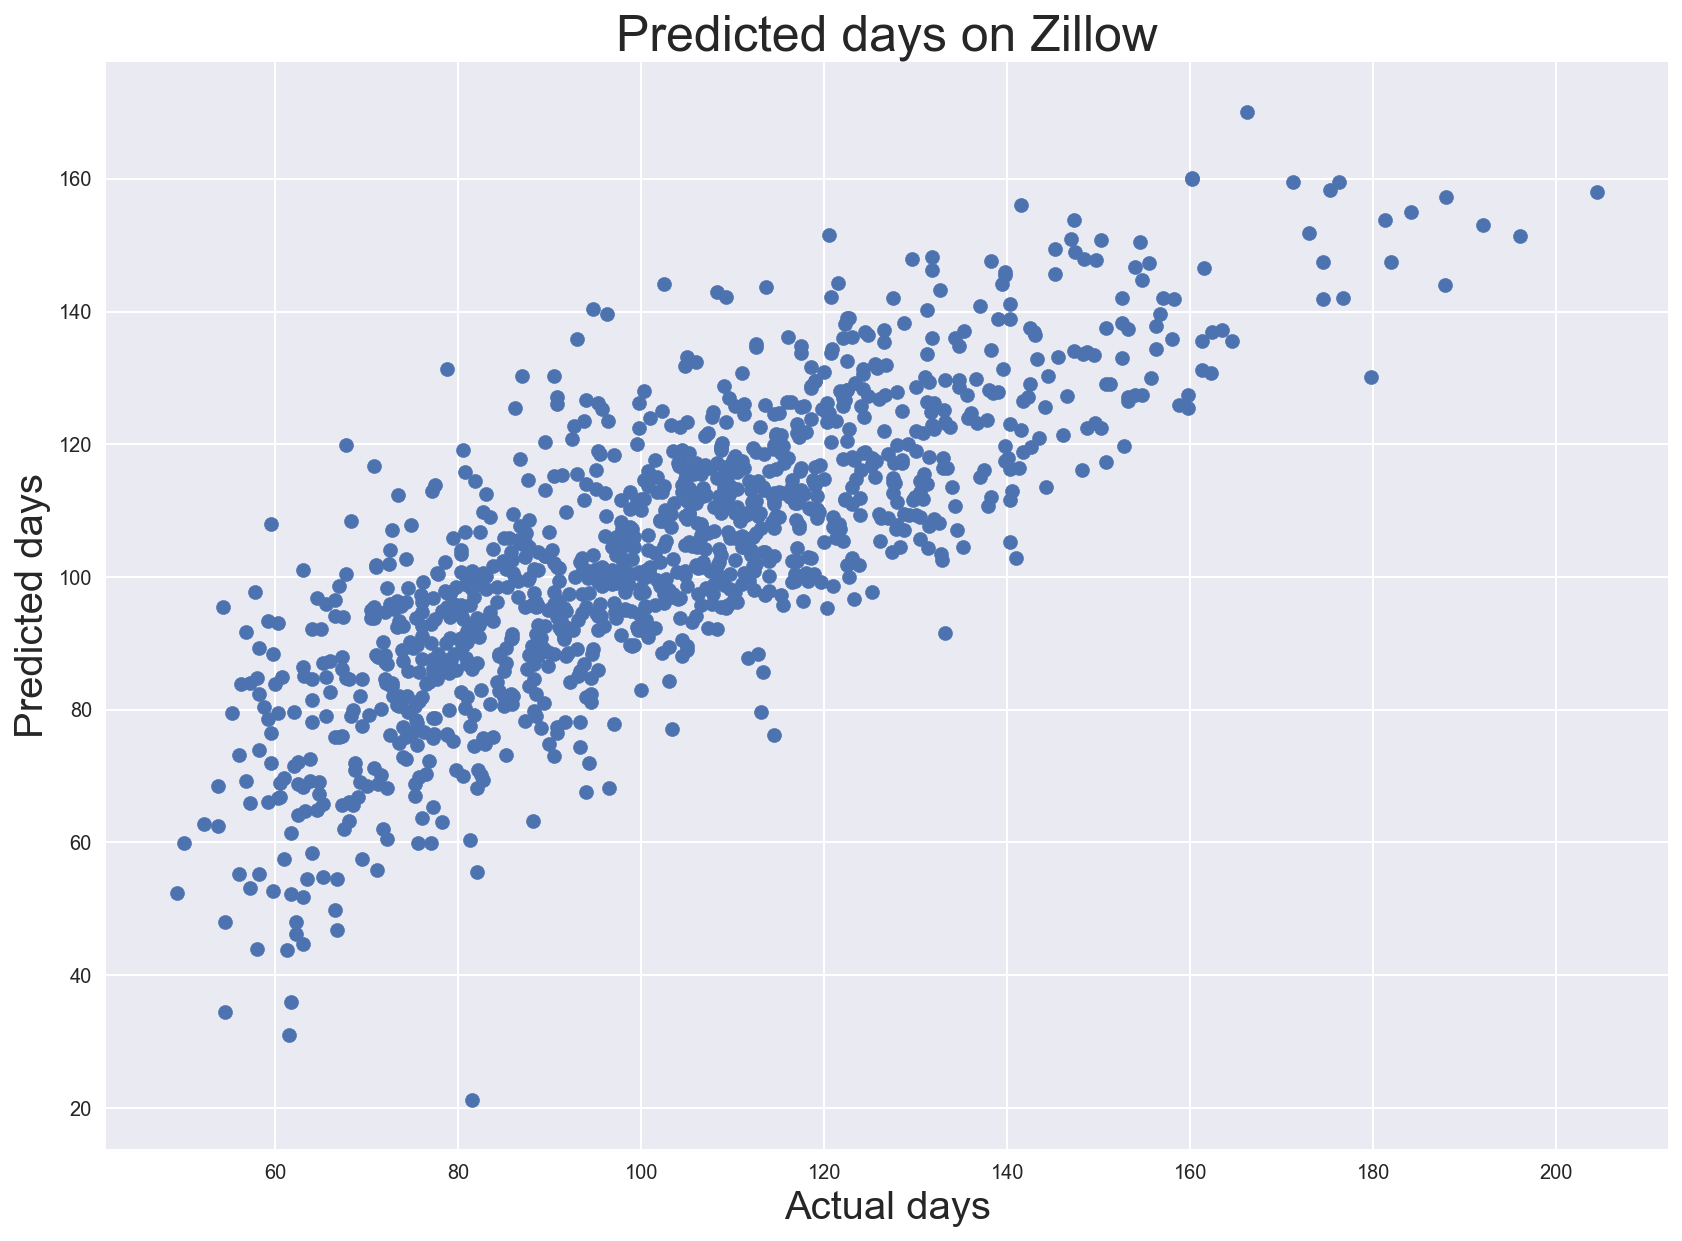

In [20]:
lRegr = LinearRegression()
X = clean_data.drop('DaysOnZillow_AllHomes',axis=1)
y = clean_data['DaysOnZillow_AllHomes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lRegr.fit(X_train, y_train)
plt.figure(figsize=(14,10))
plt.scatter(y_test ,lRegr.predict(X_test))
plt.xlabel("Actual days", fontsize = 20)
plt.ylabel("Predicted days", fontsize = 20)
plt.title("Predicted days on Zillow", fontsize = 25)

## Accuracy of Linear Model

As we inspected that the data dont have linear shape. Our linear regression model didnt perform very well. The accuracy score is only 63%. 

In [21]:
accuracy = lRegr.score(X_test,y_test)
print(accuracy*100,'%')

63.36846422271445 %


In [22]:
linear_coef = pd.DataFrame({'Features' :X_test.columns,'Coef':lRegr.coef_})
top_features =linear_coef.sort_values(by='Coef',ascending=False)

## Random Forest 

Random forest usually performs very well on non linear data. 

In [23]:
rf_regression = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_regression.fit(X_test,y_test);
# Use the forest's predict method on the test data
predictions = rf_regression.predict(X_test)
# Calculate the absolute errors
accuracy = rf_regression.score(X_test,y_test)
print(accuracy*100,'%')

97.6682752676353 %


Most of the time Random Forest algorithm overfits the data and the accuracy is pretty high. We will use cross validation and grid search to validate the model.

In [24]:
all_accuracies = cross_val_score(estimator=rf_regression, X=X_train, y=y_train, cv=5)  
print("Criss validation scores", all_accuracies)  

print("Average of all grids accuracy scores ", all_accuracies.mean())

print("Standard deviation of all grids", all_accuracies.std())  


Criss validation scores [0.8208156  0.79836385 0.84166266 0.8387334  0.84508117]
Average of all grids accuracy scores  0.8289313359633972
Standard deviation of all grids 0.017431124473025587


In [25]:
grid_param = {  
    'n_estimators': [100, 500, 1000],
    'max_features': ["auto"],
    'min_samples_split': [2,4,8],
    'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator=rf_regression,  
                     param_grid=grid_param,
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)  
best_parameters = gd_sr.best_params_  
print("Best Parameters using grid search ",best_parameters)

Best Parameters using grid search  {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}


In [26]:
best_result = gd_sr.best_score_  
print("Best score ", best_result) 

Best score  0.8290456461754313


In [27]:
top_features = pd.DataFrame(rf_regression.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

top_features.head()

,importance
PctOfHomesIncreasingInValues_AllHomes,0.343326
PriceToRentRatio_AllHomes,0.074254
PctOfListingsWithPriceReductions_AllHomes,0.071725
MedianListingPricePerSqft_2Bedroom,0.062914
MedianListingPricePerSqft_SingleFamilyResidence,0.049897


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


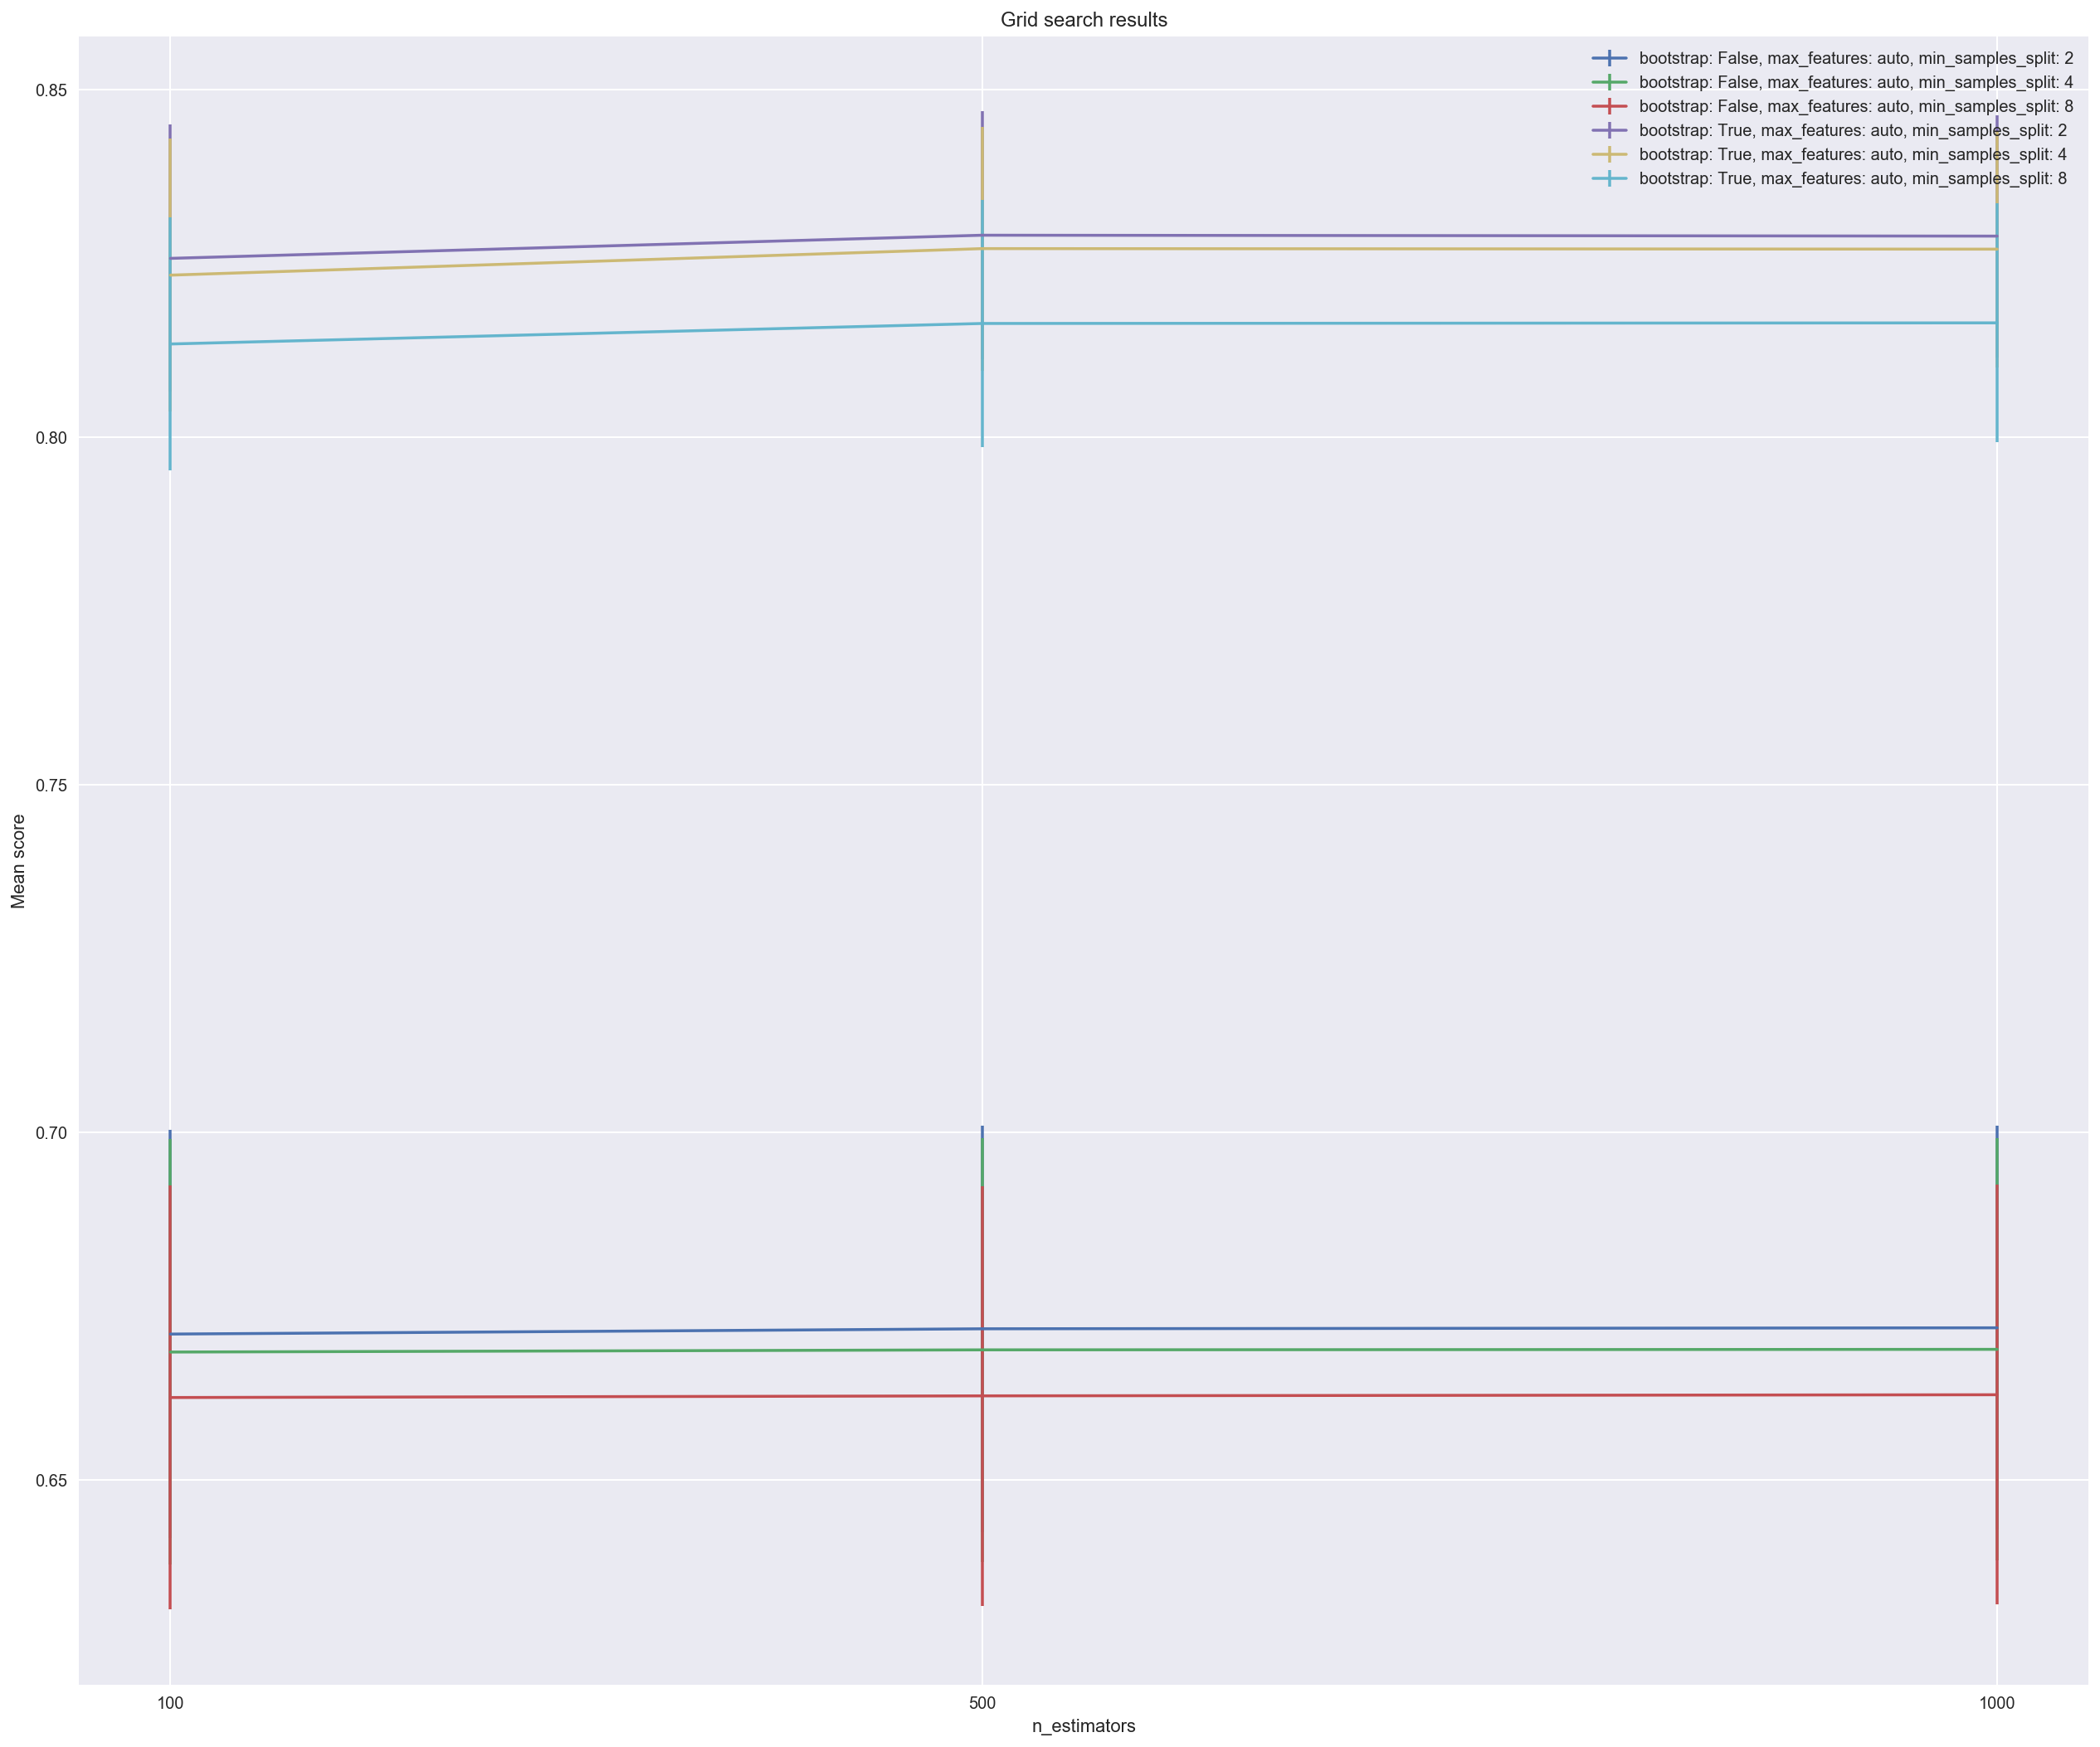

In [28]:
to_vary = 'n_estimators'
grid_search(gd_sr.grid_scores_, to_vary)
plt.show()

### Converting the Target into classification

We can try to figure out that if the home is going to list for sale on site above average days or below average days.

For that, we have to transform out target feature. We will figure out the average days and then impute 0 for below average and 1 for above average. For classification problem, we can use logistic regression or random forest classifier.

([<matplotlib.axis.XTick at 0x10ee4c320>,
 <a list of 3 Text xticklabel objects>)

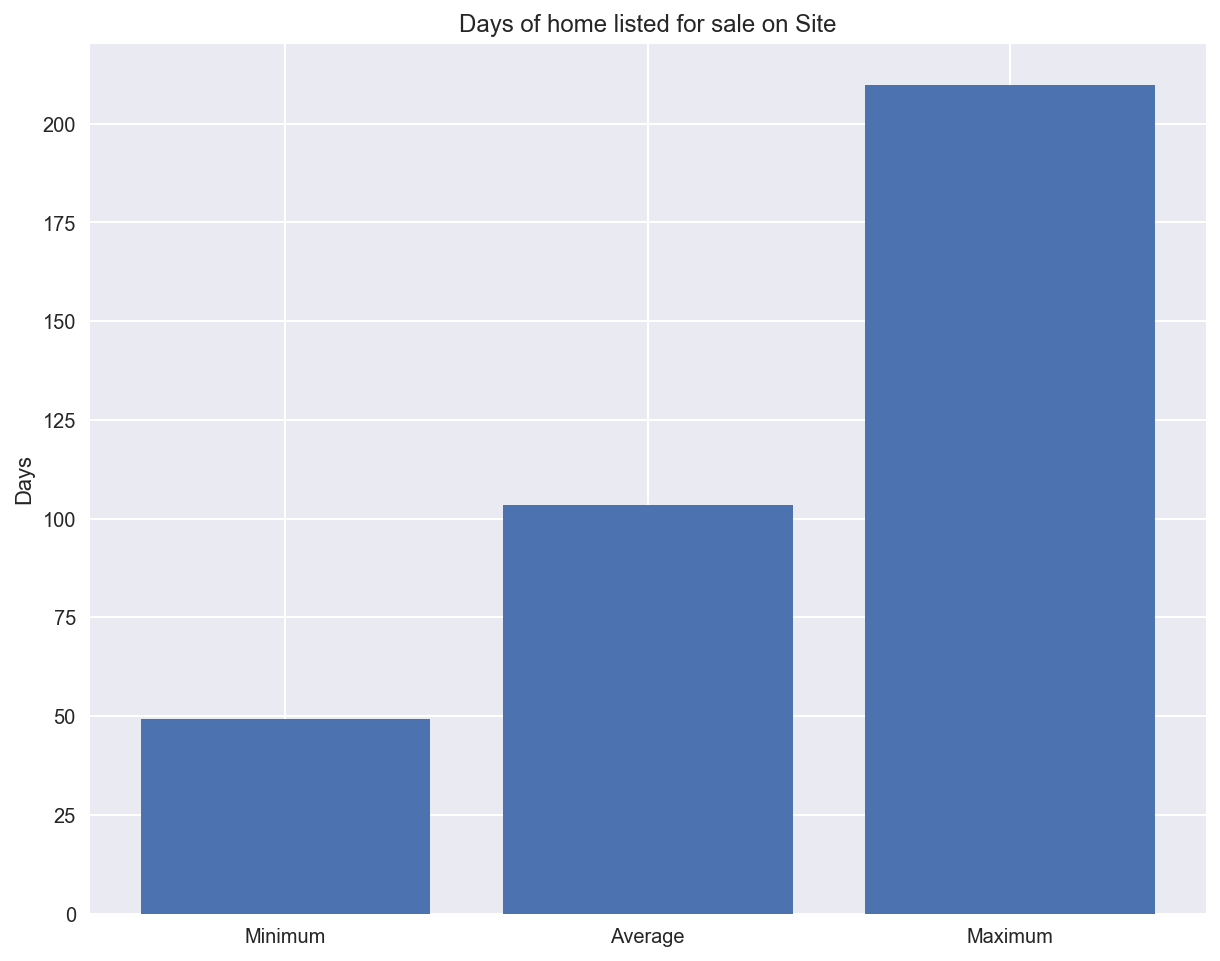

In [29]:
classification_data = clean_data.copy()
classification_data.DaysOnZillow_AllHomes[classification_data['DaysOnZillow_AllHomes'] <=101]=0
classification_data.DaysOnZillow_AllHomes[classification_data['DaysOnZillow_AllHomes'] >101]=1

average = clean_data.DaysOnZillow_AllHomes.mean()
maximum = clean_data.DaysOnZillow_AllHomes.max()
minimum = clean_data.DaysOnZillow_AllHomes.min()
min_max = [minimum,average,maximum]
names = ['Minimum','Average', 'Maximum']

plt.figure(figsize=(10,8))
y_pos = np.arange(3)
plt.bar(y_pos, min_max)
plt.ylabel("Days")
plt.title("Days of home listed for sale on Site")
plt.xticks(np.arange(3),('Minimum','Average' ,'Maximum'))

## Logistic Regression

In [30]:
logRegr = LogisticRegression()
X = classification_data.drop('DaysOnZillow_AllHomes',axis=1)
y =  classification_data['DaysOnZillow_AllHomes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
logRegr.fit(X_train, y_train)
predictions = logRegr.predict(X_test)
# Calculate the absolute errors
accuracy = logRegr.score(X_test,y_test)
print(accuracy*100,'%')

76.06244579358196 %


As we can see that Logistic regression's accuracy score is 80% comapre to Linear regression model.

However, this dataset does not have much correlation features to predict the days that home is going to stay on the site. We need such information such as zipcode, size of home, bedrooms, bathrooms, yearbuilt. 



## Random Forest Classifier

In [31]:
X = classification_data.drop('DaysOnZillow_AllHomes',axis=1)
y = classification_data['DaysOnZillow_AllHomes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
rf_classifier = RandomForestClassifier(n_estimators = 300, random_state = 0)
rf_classifier.fit(X_test,y_test);
# Use the forest's predict method on the test data
predictions = rf_classifier.predict(X_test)
# Calculate the absolute errors
accuracy = rf_classifier.score(X_test,y_test)
print(accuracy*100,'%')

100.0 %


As we can see that again Random Forest Classifier's accuracy score is 100%. As earlier mentioned that most of the times these model overfits the data.Again we will be using cross validation and Grid Search for the best parameter for this model.

In [32]:
all_accuracies = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=5)  
print("Grid Search models's accuracies", all_accuracies)  

print("Average of combined grids", all_accuracies.mean())

print("Standard Deviation ", all_accuracies.std())  


Grid Search models's accuracies [0.8962536  0.86127168 0.85507246 0.87826087 0.90434783]
Average of combined grids 0.8790412876052687
Standard Deviation  0.019118354121825398


In [33]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator=rf_classifier,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)  
best_parameters = gd_sr.best_params_  
print("Best Parameters", best_parameters)  
best_result = gd_sr.best_score_  
print("Besr score", best_result*100)  

Best Parameters {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 300}
Besr score 88.36805555555556


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


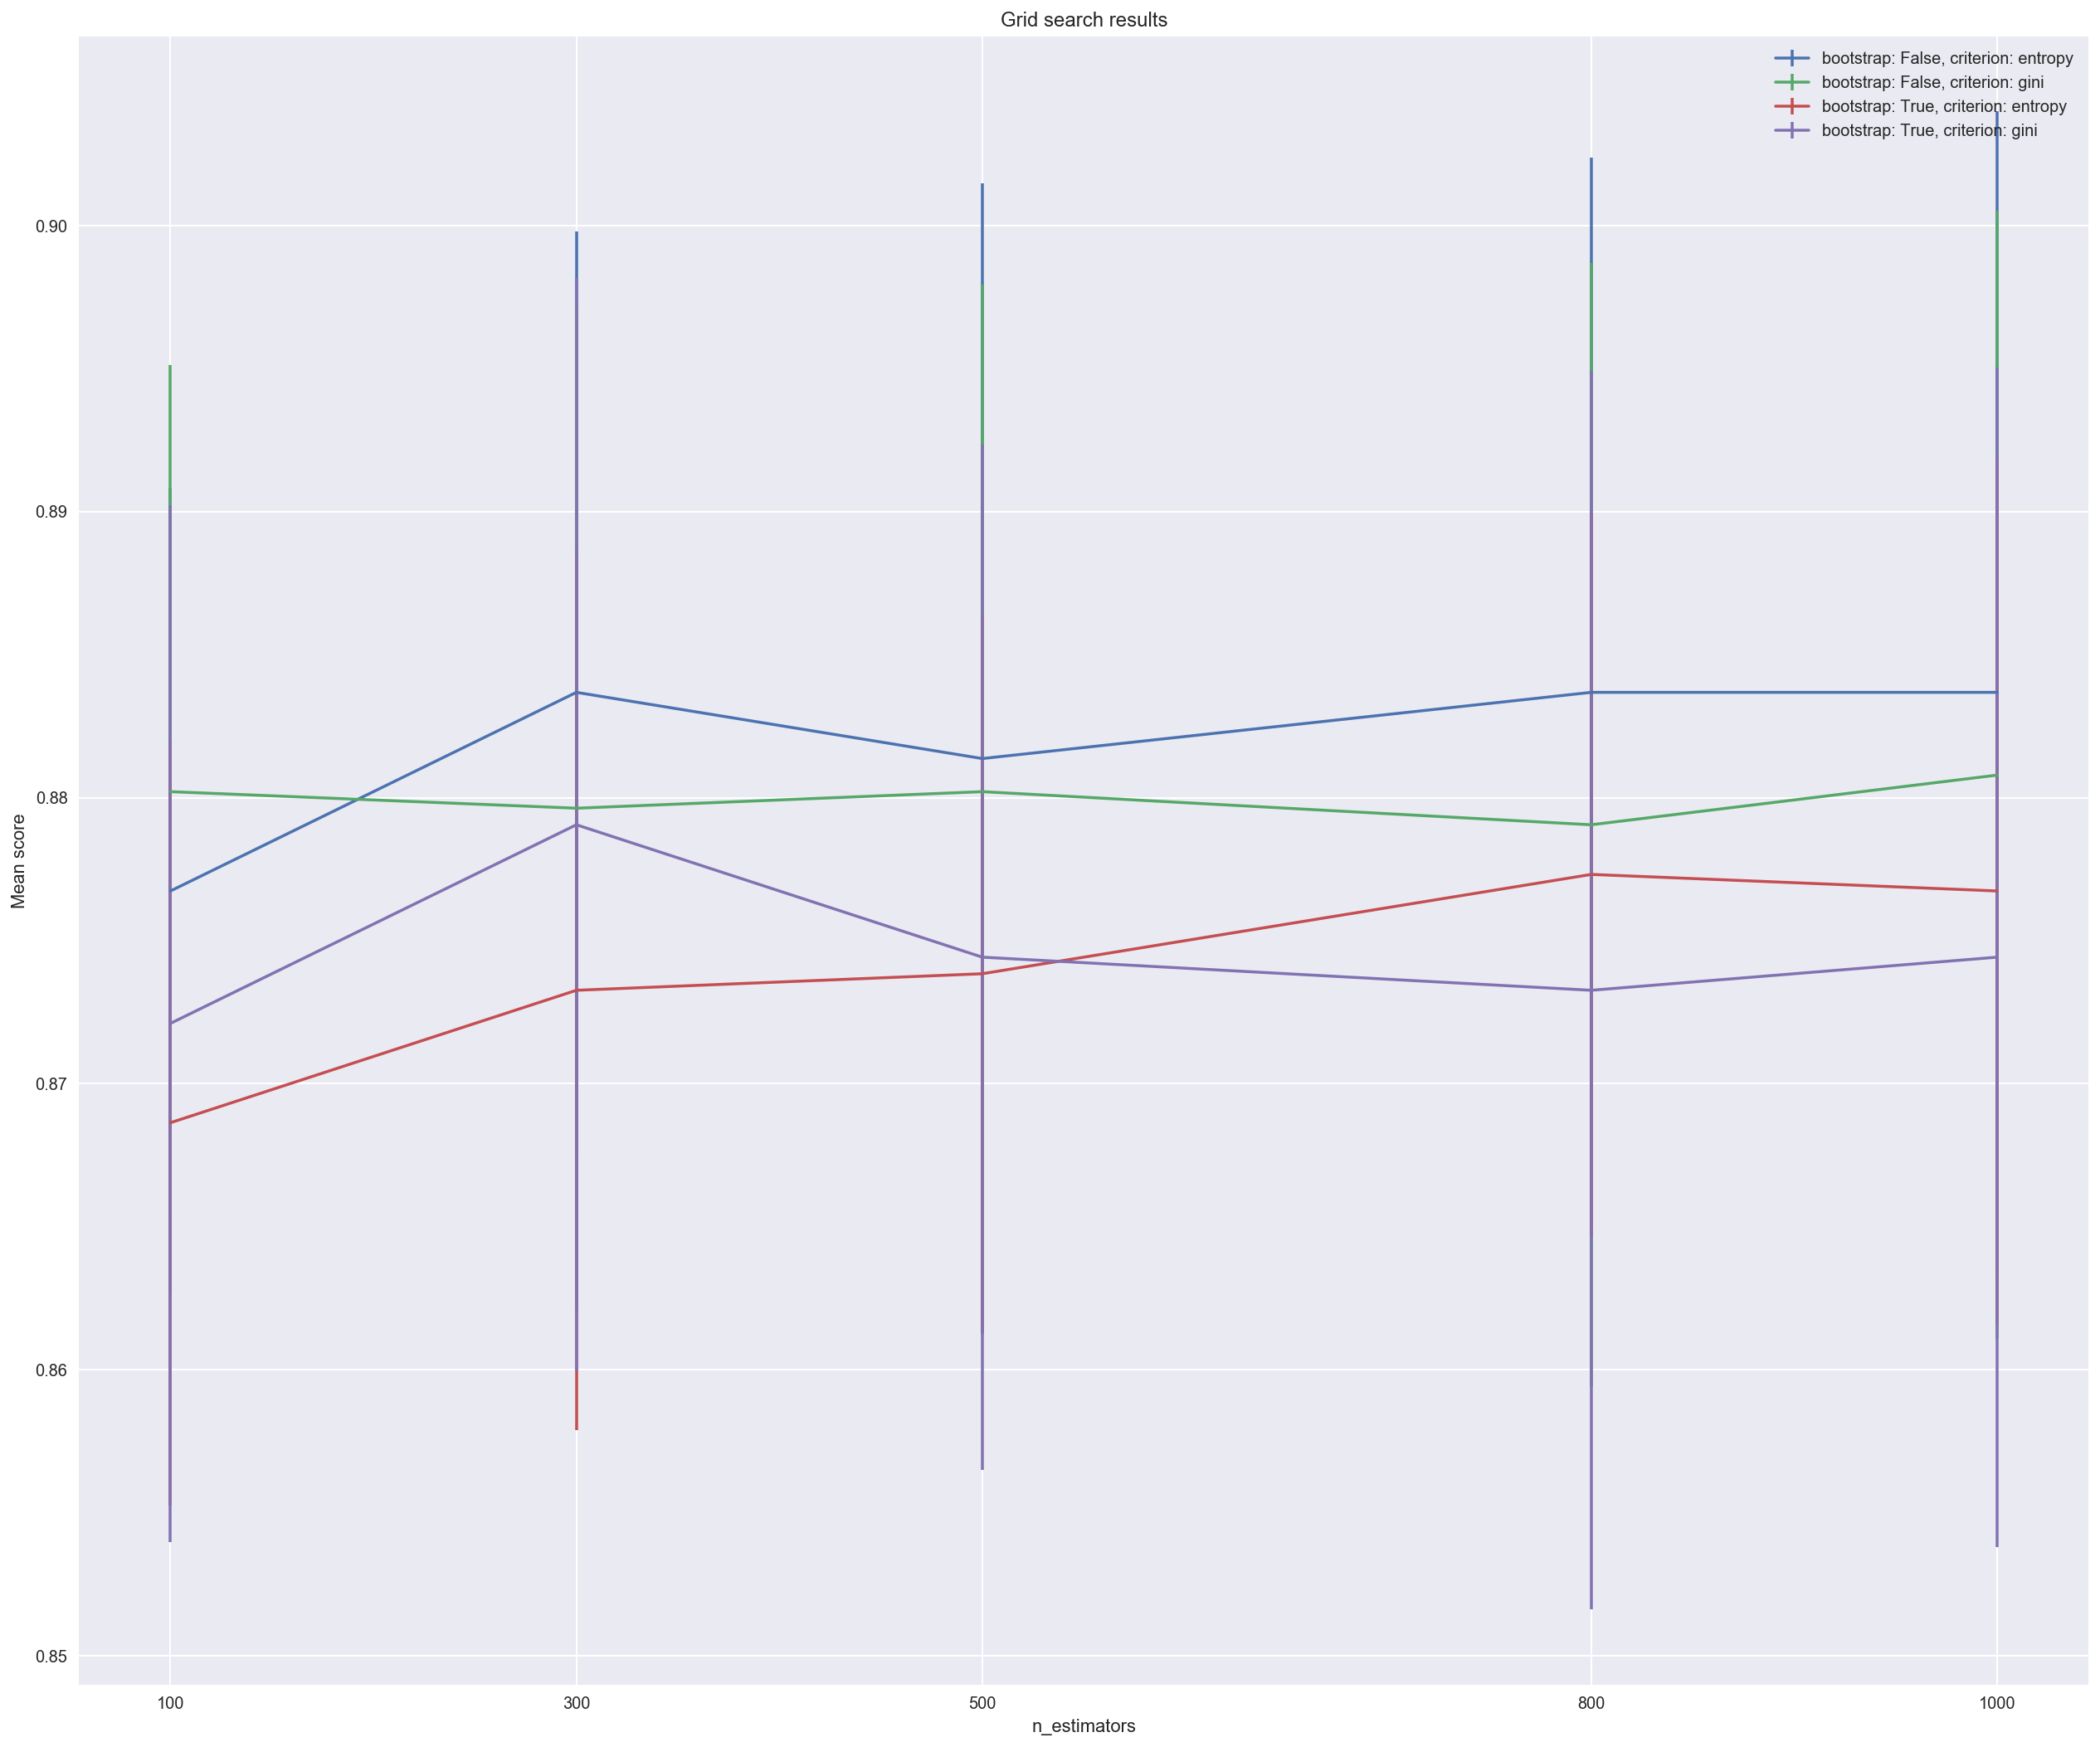

In [34]:
to_vary = 'n_estimators'
grid_search(gd_sr.grid_scores_, to_vary)
plt.show()

In [35]:
# 